# Data Analysis Cycle

<center><img src='./img/DataAnalysis_CycleTS0.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle1.png' width='800'></center>
<center><img src='./img/DataAnalysis_CycleTS1.png' width='800'></center>
<center><img src='./img/DataAnalysis_CycleTS2.png' width='800'></center>
<center><img src='./img/DataAnalysis_CycleTS5.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle4.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle5.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle6.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle7.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle8.png' width='800'></center>
<center><img src='./img/DataAnalysis_Cycle9.png' width='800'></center>

# **Import Library:** 분석에 사용할 모듈 설치

In [90]:
# !pip install --upgrade pip
# !python -m pip install --user --upgrade pip

In [91]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error

# **Data Loading:** 분석에 사용할 데이터 불러오기

<center><img src='./img/Data_BikeSharingDemand.png' width='800'></center>

| **변수** 	| **설명** 	|
|-----|-----|
| **datetime** 	| 날짜시간정보 	|
| **season** 	| 계절 	|
| **holiday** 	| 휴일여부 	|
| **workingday** 	| 주중/주말 	|
| **weather** 	| 날씨 	|
| **temp** 	| 온도 	|
| **atemp** 	| 체감 온도 	|
| **humidity** 	| 습도 	|
| **windspeed** 	| 풍속도 	|
| **casual** 	| 비회원 대여수량 	|
| **registered** 	| 회원 대여수량 	|
| **count** 	| 총 대여수량 	|

In [92]:
# # Colab에서 실행
# # 아래 코드 실행 후 파일 선택을 눌러서 
# # 'Bike_Sharing_Demand_Full.csv' 파일을 선택해주면 로딩 완료
# from google.colab import files
# files.upload()

# # 아래 코드 실행 시 'Bike_Sharing_Demand_Full.csv' 데이터 출력 가능
# import pandas as pd
# df = pd.read_csv('Bike_Sharing_Demand_Full.csv')
# df

In [93]:
# PC에 저장된 데이터의 위치 확인
# 파이썬이 데이터 위치를 확인할 수 있게 코드로 변환
# pandas 사용하여 데이터 불러오기
# 불러온 데이터 이름은 통상 dataframe의 약자인 df로 사용하는 편
location = os.path.join('.', 'data', 'Bike_Sharing_Demand_Full.csv')
df = pd.read_csv(location)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


# **Preprocessing:** 데이터 정리 및 패턴 추출하기

- **목표:** 

    - 대량으로 수집된 데이터는 `그대로 활용 어려움`
    
    - `잘못 수집/처리 된 데이터`는 엉뚱한 결과를 발생
    
    - 알고리즘이 `학습이 가능한 형태`로 데이터를 정리

<img src='./img/DataAnalysis_Time.jpg' width='500'>


**일반적인 전처리 필요항목:**  

- 데이터 결합

- 결측값 처리

- 이상치 처리

- 자료형 변환

- `데이터 분리`

- `데이터 변환`

- 스케일 조정

$\Rightarrow$ **"알고리즘의 범위와 종류가 다양하여, `각 알고리즘의 입력에 맞게 변환`하는 것이 최선"**

## 시계열 변수 추출

#### 1) 시계열 데이터는 `여러 구성 성분`

- **시계열 = `체계적 성분` + 불규칙 성분**

<img src='./img/TimeSeries_Decomposition.png' width='600'>

| **시계열 방향** 	| **시계열 구성요소** 	| **의미** 	|
|-----|-----|-----|
| **장기적 움직임** 	| **추세(Trend)** 	| 장기적으로 시간흐름에 따른 데이터의 상승/하강 경향 	|
| **단기적 움직임** 	| **계절성(Seasonality)** 	| 특정기간 간격으로 반복적으로 나타나는 패턴 	|
| | **주기(Cycle)** 	| 계절변동으로 설명되지 않는 패턴(기후변화, 정책변화, 사회관습 등) 	|
| **불규칙 움직임** 	| **에러(Error)** 	| 사전(Prior)적으로 예측할 수 없는 특수 패턴(지진, 전쟁, 파업 등) 	|

#### 2) 여러 구성성분들이 `단기적 및 장기적`으로 복합적으로 융합되어 작동

<img src='img/TS_Example3.png' width='600'>(http://www.sbr.ai/news/articleView.html?idxno=1608)

In [94]:
# 데이터의 각 column의 타입을 확인하기
# df.shape
# df.ndim
# df.head()
# df.tail()
# df.describe(include='all').T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


In [95]:
# 데이터 수치 확인
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


In [96]:
# 시간정보가 문자로 인식되는 경우 datetime 형식으로 변환하기
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['DateTime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
 12  DateTime    17379 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.7 MB


In [97]:
# 현재 df의 index 확인
df.index

RangeIndex(start=0, stop=17379, step=1)

In [98]:
# 현재 df의 index 형태 확인
df.index.dtype

dtype('int64')

In [99]:
# df의 index를 시간정보로 변경하기
# inplace=True 파라미터가 없어서 실제 값이 변경되진 않음
df.set_index('datetime')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,DateTime
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,2012-12-31 21:00:00


In [100]:
# df의 index를 시간정보로 변경하기
if df.index.dtype == 'int64':
    df.set_index('DateTime', inplace=True)
df

# # df의 index를 원래대로 복원하기
# if df.index.dtype != 'int64':
#     df.reset_index(drop=False, inplace=True)
# df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
DateTime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90


In [101]:
# 데이터 변경사항 확인
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17379,17379,2011-01-01,1,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,379.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,379.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,379.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,379.00",NaN,NaT,NaN,NaT,NaT,1.43,0.64,1.00,1.00,1.00,2.00,4.00
temp,"17,379.00",NaN,NaT,NaN,NaT,NaT,20.38,7.89,0.82,13.94,20.50,27.06,41.00
atemp,"17,379.00",NaN,NaT,NaN,NaT,NaT,23.79,8.59,0.00,16.66,24.24,31.06,50.00
humidity,"17,379.00",NaN,NaT,NaN,NaT,NaT,62.72,19.29,0.00,48.00,63.00,78.00,100.00
windspeed,"17,379.00",NaN,NaT,NaN,NaT,NaT,12.74,8.20,0.00,7.00,13.00,17.00,57.00
casual,"17,379.00",NaN,NaT,NaN,NaT,NaT,35.68,49.31,0.00,4.00,17.00,48.00,367.00


In [102]:
# 데이터 결측치 확인
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 3) 빈도(Frequency)

- `계절성 패턴(Seasonality)`이 나타나기 전까지의 `데이터 갯수`로 분석가가 반영 

- **예시1**  
    
| **Data** | Case | Frequency |
|-----|-----|-----|
| **Annual** | **Annual** | 1 |
| **Quarterly** | **Annual** | 4 |
| **Monthly** | **Annual** | 12 |
| **Weekly** | **Annual** | 52 |

- **예시2**  

| **Data** | Seasonality | Frequency |
|-----|-----|-----|
| **Daily(데이터가 Day 단위로 수집)** | **Weekly** | 7 |
|  | **Annual** | 365 |

- **예시3** 

| **Data** | Seasonality | Frequency |
|-----|-----|-----|
| **Minutely(데이터가 Minute 단위로 수집)** | **Hourly** | 60 |
|  | **Daily** | 24 x 60 |
|  | **Weekly** | 24 x 60 x 7 |
|  | **Annual** | 24 x 60 x 365 |

- **`빈도 설정`을 위한 `Python 함수 옵션`**

| Alias | Description |
|-----|-----|
| **B** | Business day |
| **D** | Calendar day |
| **W** | Weekly |
| **M** | Month end |
| **Q** | Quarter end |
| **A** | Year end |
| **BA** | Business year end |
| **AS** | Year start |
| **H** | Hourly frequency |
| **T, min** | Minutely frequency |
| **S** | Secondly frequency |
| **L, ms** | Millisecond frequency |
| **U, us** | Microsecond frequency |
| **N, ns** | Nanosecond frequency |

- **빈도 설정 후 `비어있는 시간간격`을 채우기 위한 `Python 함수 옵션`**

    - 시계열에는 `노이즈 데이터 또는 관찰되지 못한 기간`이 종종 존재

    - 측정하고 데이터를 기록하는 과정에서의 `오류나 예측치 못한 상황으로 인해 발생`

    - 예를들어 `상품의 품절`로 인하여 장기간 `판매량이 없는 경우` 데이터는 없을 수 있고 이를 `적절하게 전처리 하는 것`이 실제 문제해결 성능에 매우 중요

| Method | Description |
|-----|-----|
| **bfill** | Backward fill |
| **count** | Count of values |
| **ffill** | Forward fill |
| **first** | First valid data value |
| **last** | Last valid data value |
| **max** | Maximum data value |
| **mean** | Mean of values in time range |
| **median** | Median of values in time range |
| **min** | Minimum data value |
| **nunique** | Number of unique values |
| **ohlc** | Opening value, highest value, lowest value, closing value |
| **pad** | Same as forward fill |
| **std** | Standard deviation of values |
| **sum** | Sum of values |
| **var** | Variance of values |

In [103]:
# df의 index가 시간정보로 반영되어 있는지 확인
# 하지만 컴퓨터는 빈도는 모르겠다고 함
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17379, freq=None)

In [104]:
# 우리가 설정한 시간정보가 어떤 시간 단위인지 빈도를 설정한 후 index 재확인
df.asfreq('H').index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17544, freq='H')

In [105]:
# 데이터 결측치 확인
# 실제 현실 시간 공간에서 존재했어야 하는 시간값이 없을 경우 NaN으로 일단 채움
df.asfreq('H').isnull().sum()

datetime      165
season        165
holiday       165
workingday    165
weather       165
temp          165
atemp         165
humidity      165
windspeed     165
casual        165
registered    165
count         165
dtype: int64

In [106]:
# 결측치가 존재하는 시간값과 데이터 확인
df.asfreq('H')[df.asfreq('H').isnull().any(axis=1) >0 ]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
DateTime,,,,,,,,,,,,
2011-01-02 05:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 02:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-30 12:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-08 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-29 03:00:00,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# 시간정보의 빈도를 설정하면 자유롭게 다양한 시간축의 DataBase 변경이 용이
df.asfreq('D')
df.asfreq('W')
df.asfreq('M')
df.asfreq('H').isnull().sum()
df.asfreq('H').head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
DateTime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1.00,0.00,0.00,1.00,9.84,14.39,81.00,0.00,3.00,13.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,8.00,32.00,40.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1.00,0.00,0.00,1.00,9.02,13.63,80.00,0.00,5.00,27.00,32.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,3.00,10.00,13.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1.00,0.00,0.00,1.00,9.84,14.39,75.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-04 23:00:00,2011-01-04 23:00:00,1.00,0.00,1.00,1.00,8.20,11.37,69.00,6.00,2.00,9.00,11.00
2011-01-05 00:00:00,2011-01-05 00:00:00,1.00,0.00,1.00,1.00,8.20,12.88,64.00,0.00,0.00,6.00,6.00
2011-01-05 01:00:00,2011-01-05 01:00:00,1.00,0.00,1.00,1.00,6.56,9.85,74.00,6.00,0.00,6.00,6.00


In [108]:
# 최종적으로 데이터의 시간정보 빈도를 결정하고 NaN 값을 채운 후 결측치 확인
df = df.asfreq('H', method='ffill')
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### 4) 추세(Trend, $T_t$)

- 시계열이 `시간에 따라 증가, 감소 또는 일정 수준을 유지`하는 경우

**(시각적 이해)**

<img src='./img/Trend_Increasing.png' width='400'>

<img src='./img/Trend_Decreasing.png' width='400'>

<img src='./img/Trend_None.png' width='400'>

**(수학적 이해)**

- 확률과정의 기댓값 함수를 알아내는 것

- 확률과정($Y_t$)이 추정이 가능한 추세함수($f(t)$)와 정상확률과정($Y_t^s$)의 합

$$Y_t=f(t)+Y_t^s$$

#### 5) 계절성(Seasonality, $S_t$)

- 일정한 빈도로 주기적으로 반복되는 패턴($m$), 특정한 시간값(달/요일)에 따라 기대값이 달라지는 것

- **예시** : 주기적 패턴이 12개월마다 반복 ($m=12$)

<img src='./img/Seasonal.png' width=500>

- **대표적 계절성 변수 생성 2가지**

    - 수치값 그대로 반영 $\rightarrow$ `LabelEncoding`

    <img src='./img/Label_Encoding.png' width=300>

    - 계절성 주기 내 시점마다 별도 변수 생성 $\rightarrow$ `OneHotEncoding`

    <img src='./img/Dummy_Engineering.png' width=500>

#### 6) 주기 (Cycle, $C_t$)

- `일정하지 않은 빈도`로 발생하는 패턴(계절성과 다름) 

- **예시** : 빈도가 1인 경우에도 발생 가능 ($m=1$)

<img src='./img/Cycle.png' width=400>

#### 7) 시계열 분해 (추세/계절성/잔차(Residual, $e_t$))

<img src='./img/Decomposed-into-its-trend-seasonal-and-irregular.png.jpeg' width=600>

**(1) 가법모형(Additive Model):** `추세 + 계절성 + 주기 + 오차`

- 구성요소간 `독립성`을 가정하고 시계열이 `구성요소의 합` 가정

- 주로 계절성분의 진폭/분산이 시간이 흘러도 `일정한 경우` 사용

**(2) 승법모형(Multiplicative Model):** `추세 * 계절성 * 주기 * 오차`

- 구성요소간 `비독립성`을 가정하고 시계열이 `구성요소의 곱` 가정

- 주로 계절성분의 진폭/분산이 시간에 따라 `일정하지 않은 경우` 사용

In [109]:
# 종속변수의 과거 시간패턴을 확인하기 위해 종속변수 후보값 확인
df[['count', 'registered', 'casual']]

,count,registered,casual
DateTime,,,
2011-01-01 00:00:00,16,13,3
2011-01-01 01:00:00,40,32,8
2011-01-01 02:00:00,32,27,5
2011-01-01 03:00:00,13,10,3
2011-01-01 04:00:00,1,1,0
...,...,...,...
2012-12-31 19:00:00,119,108,11
2012-12-31 20:00:00,89,81,8
2012-12-31 21:00:00,90,83,7


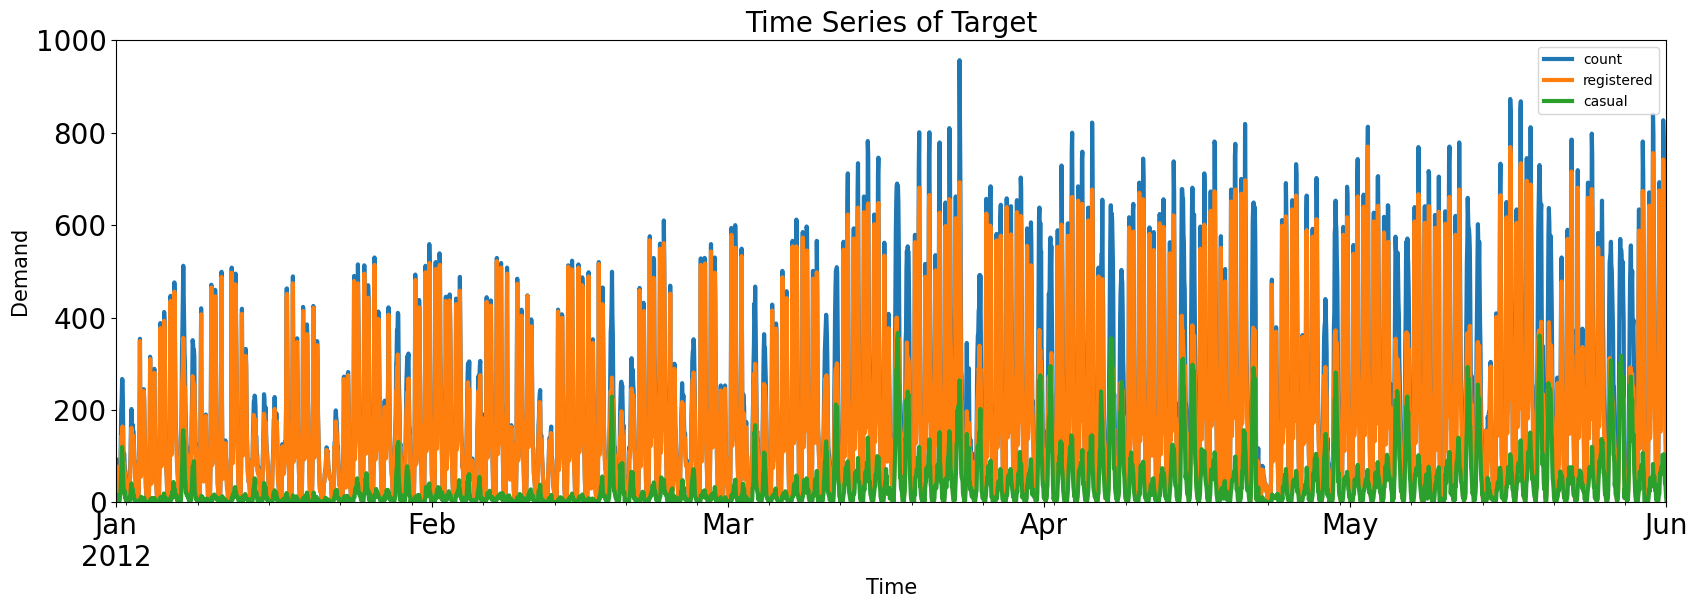

In [110]:
# 종속변수 후보값 시각화
df[['count', 'registered', 'casual']].plot(kind='line', figsize=(20, 6), linewidth=3, fontsize=20,
                                         xlim=('2012-01-01', '2012-06-01'), ylim=(0, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

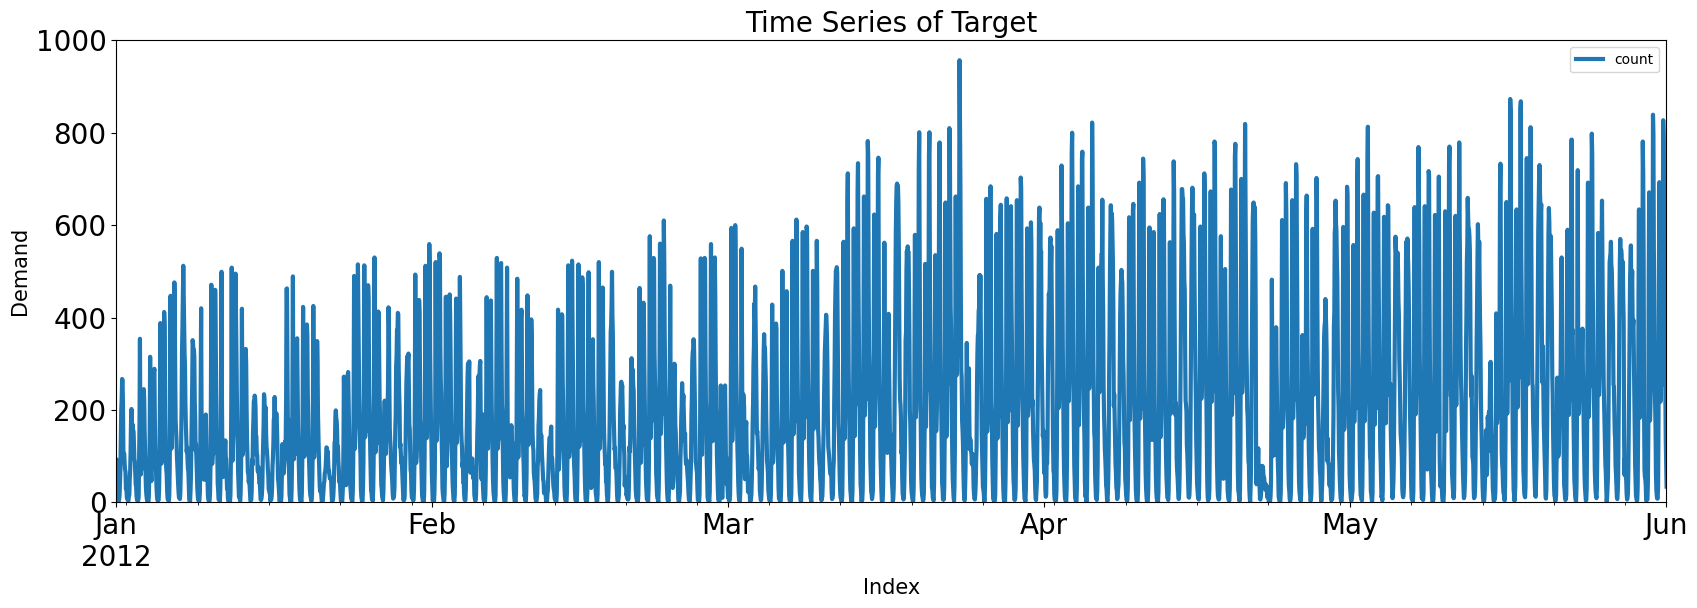

In [111]:
# 최종 종목변수 시각화
df[['count']].plot(kind='line', figsize=(20, 6), linewidth=3, fontsize=20,
                   xlim=('2012-01-01', '2012-06-01'), ylim=(0, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

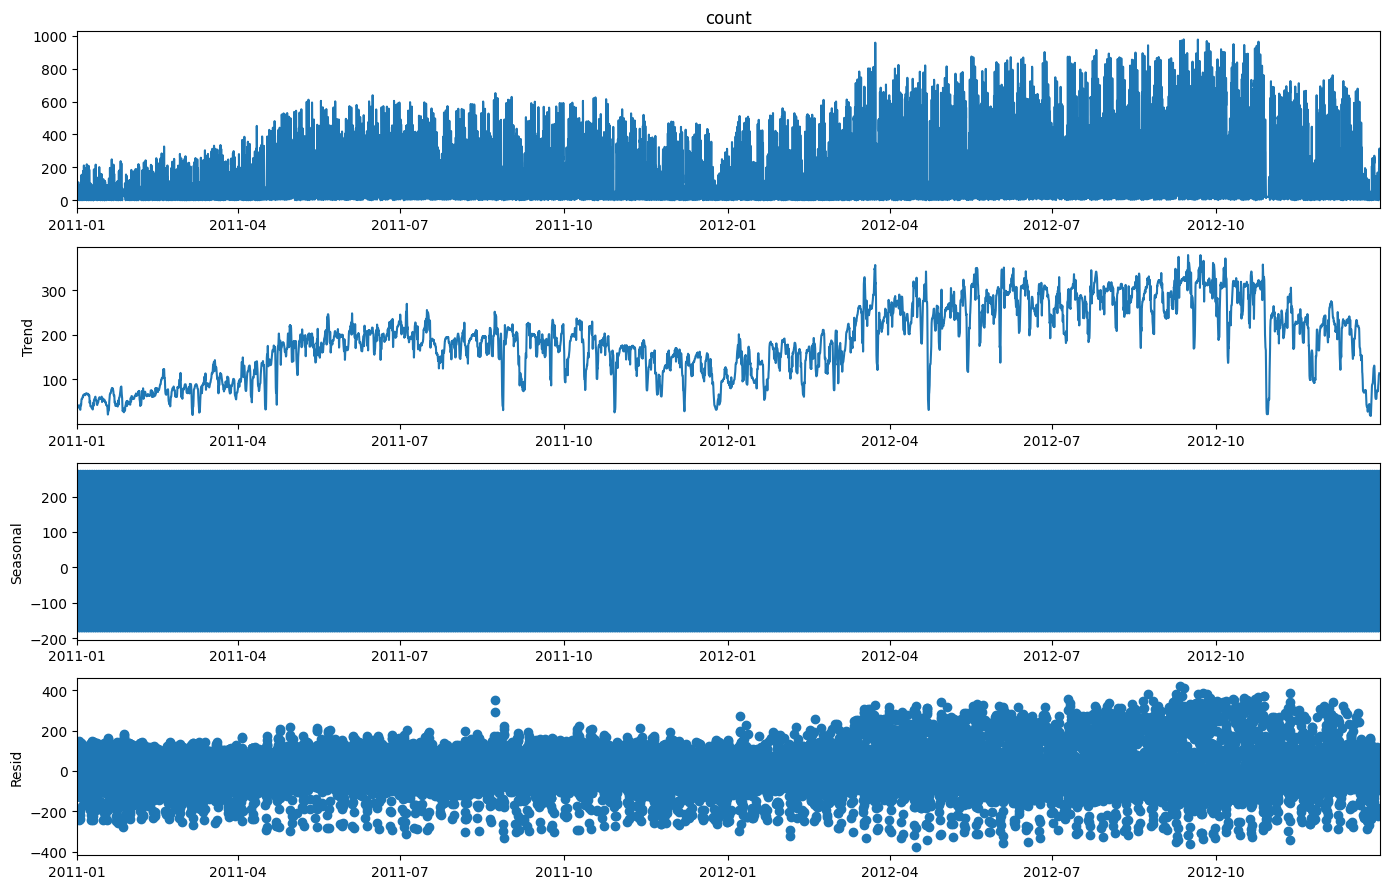

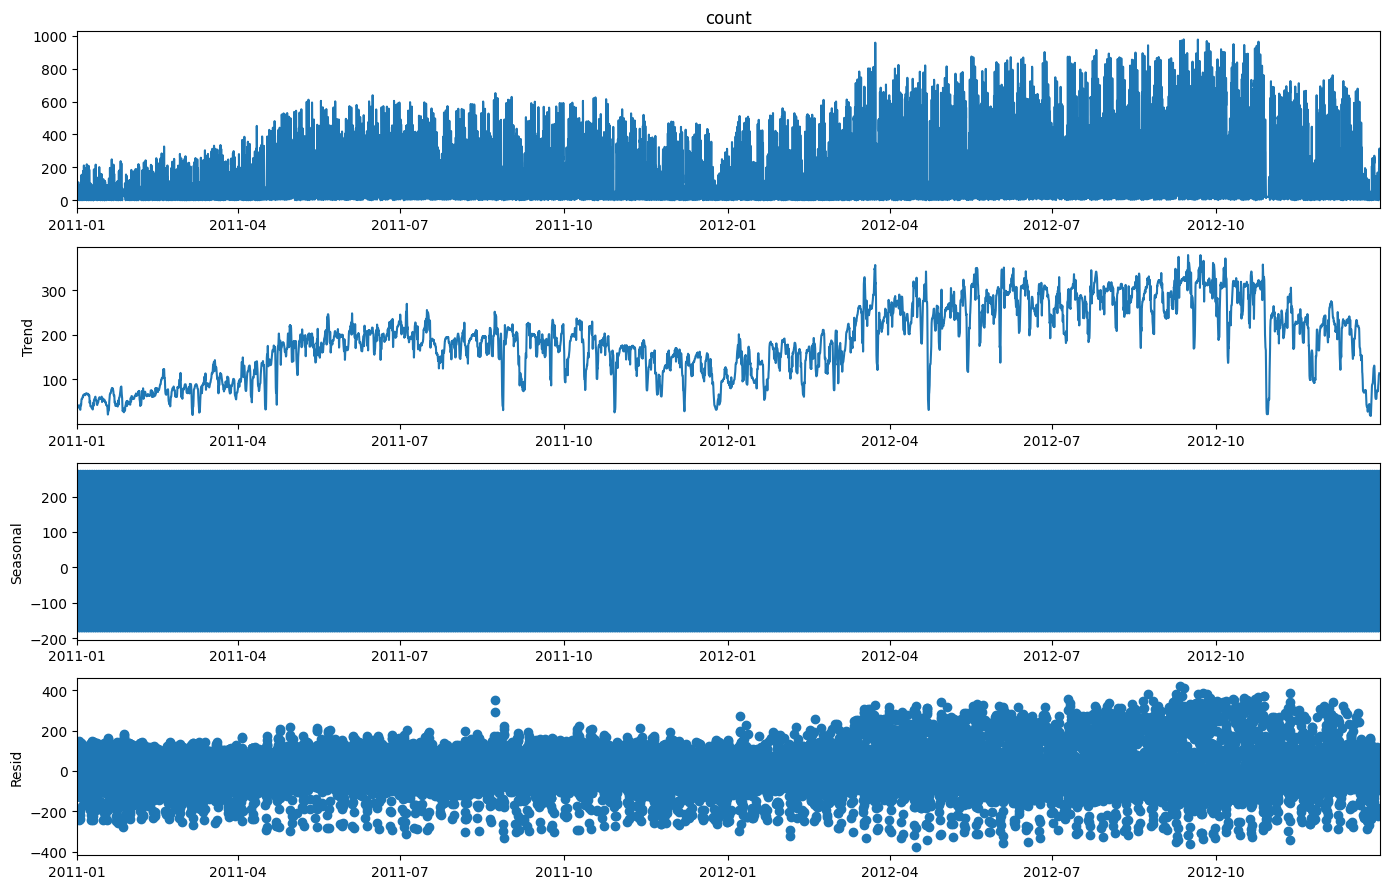

In [112]:
# 종속변수의 시계열 분해 및 시각화
sm.tsa.seasonal_decompose(df['count']).plot()

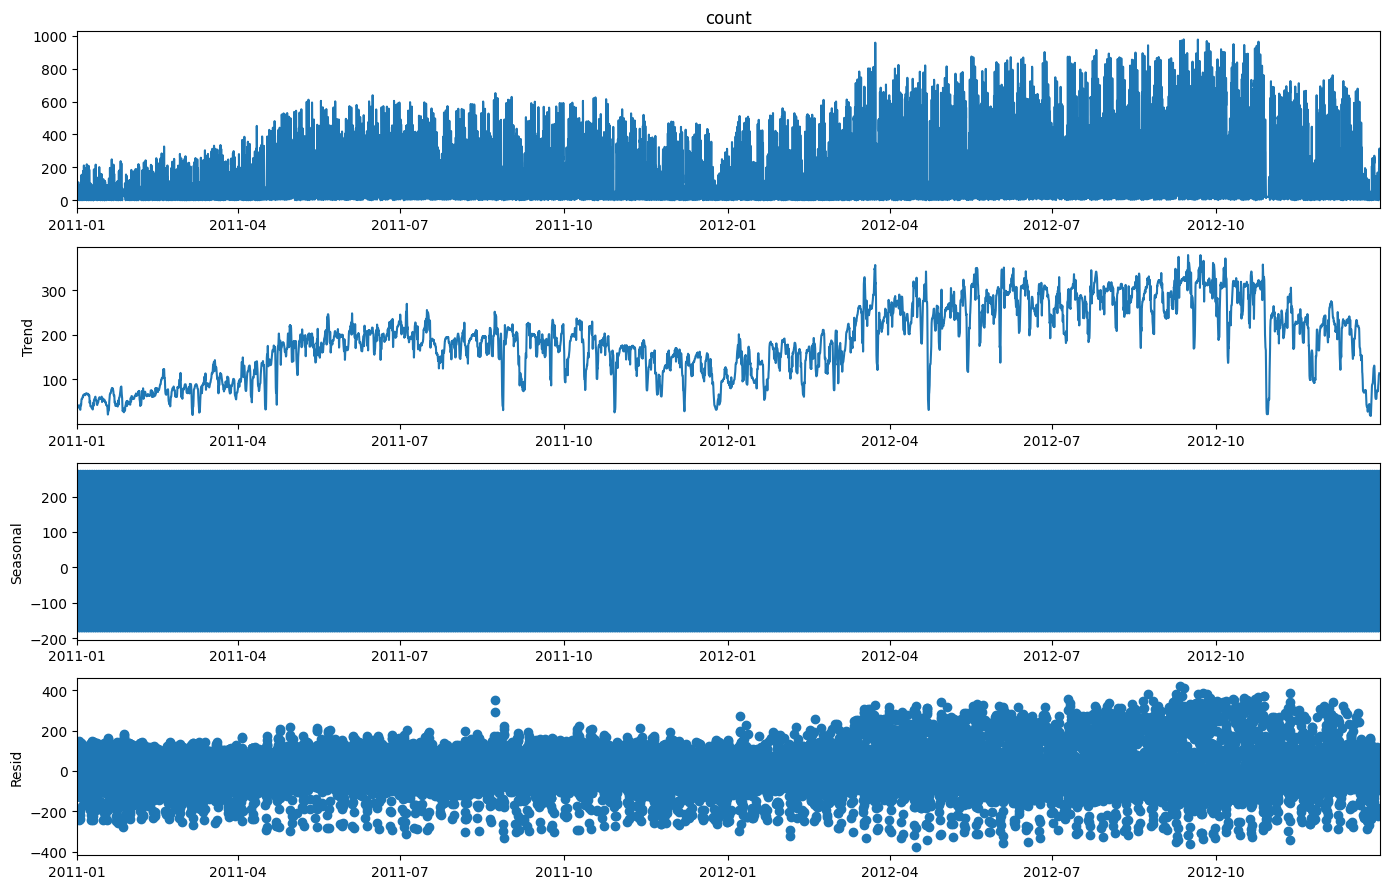

In [113]:
# 종속변수의 구성요소들이 더하기 결합을 가정한 시계열 분해 및 시각화
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(df['count'], model='additive').plot()
plt.show()

In [114]:
# 종속변수 시계열 분해 결과 저장 후 추세와 계절성 확인
result = sm.tsa.seasonal_decompose(df['count'], model='additive')
result.trend, result.seasonal

(DateTime
 2011-01-01 00:00:00   NaN
 2011-01-01 01:00:00   NaN
 2011-01-01 02:00:00   NaN
 2011-01-01 03:00:00   NaN
 2011-01-01 04:00:00   NaN
                        ..
 2012-12-31 19:00:00   NaN
 2012-12-31 20:00:00   NaN
 2012-12-31 21:00:00   NaN
 2012-12-31 22:00:00   NaN
 2012-12-31 23:00:00   NaN
 Freq: H, Name: trend, Length: 17544, dtype: float64,
 DateTime
 2011-01-01 00:00:00   -134.25
 2011-01-01 01:00:00   -154.75
 2011-01-01 02:00:00   -165.27
 2011-01-01 03:00:00   -176.48
 2011-01-01 04:00:00   -181.67
                         ...  
 2012-12-31 19:00:00    122.70
 2012-12-31 20:00:00     37.48
 2012-12-31 21:00:00    -16.10
 2012-12-31 22:00:00    -56.94
 2012-12-31 23:00:00   -100.31
 Freq: H, Name: seasonal, Length: 17544, dtype: float64)

In [115]:
# 종속변수 추세추출 및 저장
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns = ['count_trend']
Y_trend

,count_trend
DateTime,
2011-01-01 00:00:00,41.06
2011-01-01 01:00:00,41.06
2011-01-01 02:00:00,41.06
2011-01-01 03:00:00,41.06
2011-01-01 04:00:00,41.06
...,...
2012-12-31 19:00:00,113.71
2012-12-31 20:00:00,113.71
2012-12-31 21:00:00,113.71


In [116]:
# 종속변수 계절성추출 및 저장
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['count_seasonal']
Y_seasonal

,count_seasonal
DateTime,
2011-01-01 00:00:00,-134.25
2011-01-01 01:00:00,-154.75
2011-01-01 02:00:00,-165.27
2011-01-01 03:00:00,-176.48
2011-01-01 04:00:00,-181.67
...,...
2012-12-31 19:00:00,122.70
2012-12-31 20:00:00,37.48
2012-12-31 21:00:00,-16.10


In [117]:
# 추출한 추세와 계절성을 df와 결합
if 'count_trend' not in df.columns:
    if 'count_seasonal' not in df.columns:
        df = pd.concat([df, Y_trend, Y_seasonal], axis=1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal
DateTime,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10


- `이동평균(Moving Average) 및 차분(Difference)` 데이터 추출

<Axes: xlabel='DateTime'>

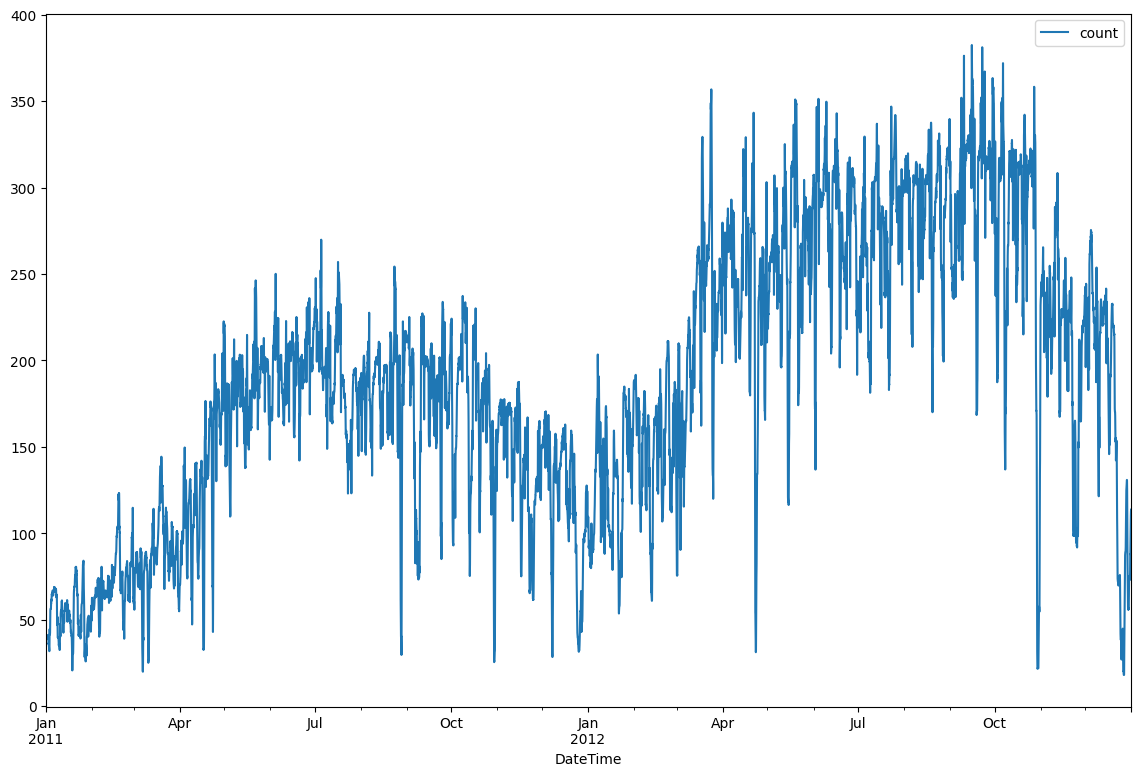

In [118]:
# 시계열의 이동평균 데이터 추출
df[['count']].rolling(24).mean().plot()

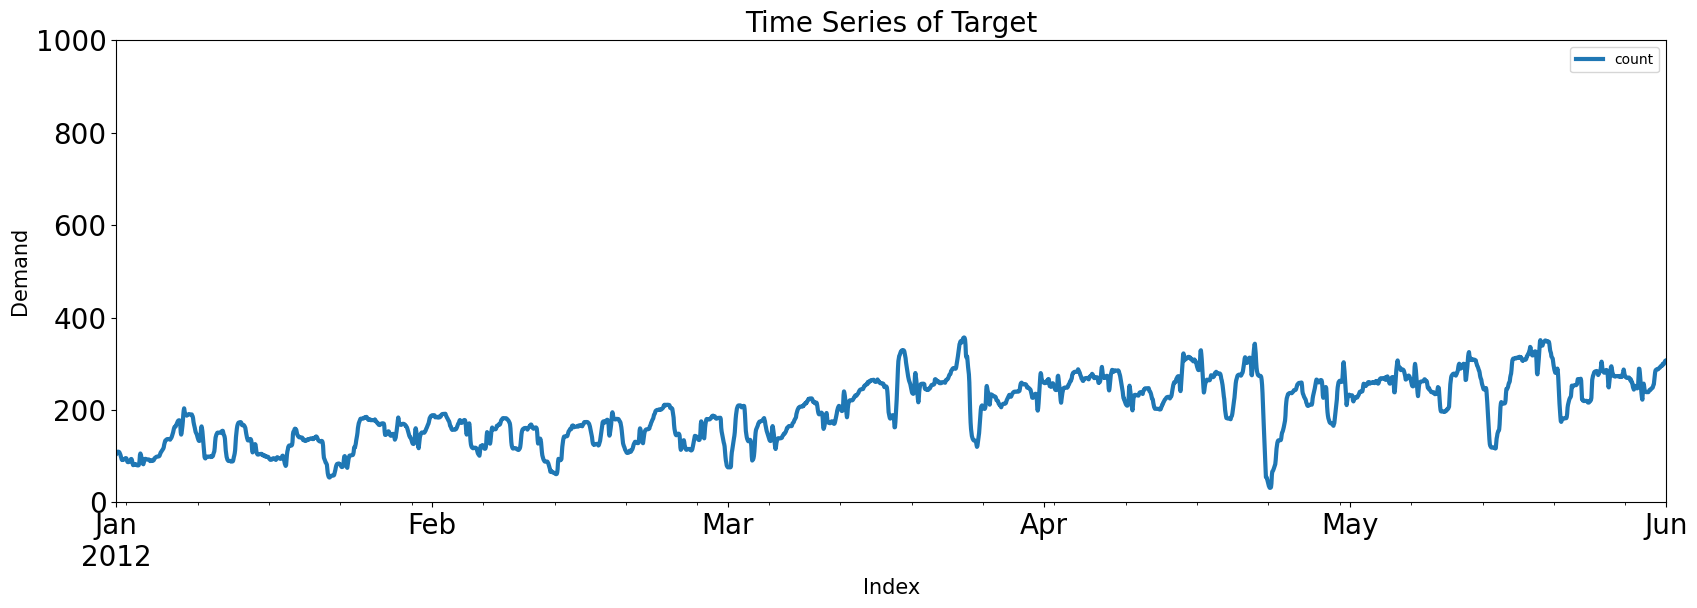

In [119]:
# 시계열의 이동평균 데이터 의미 시각화
df[['count']].rolling(24).mean().plot(kind='line', figsize=(20, 6), linewidth=3, fontsize=20,
                                      xlim=('2012-01-01', '2012-06-01'), ylim=(0, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

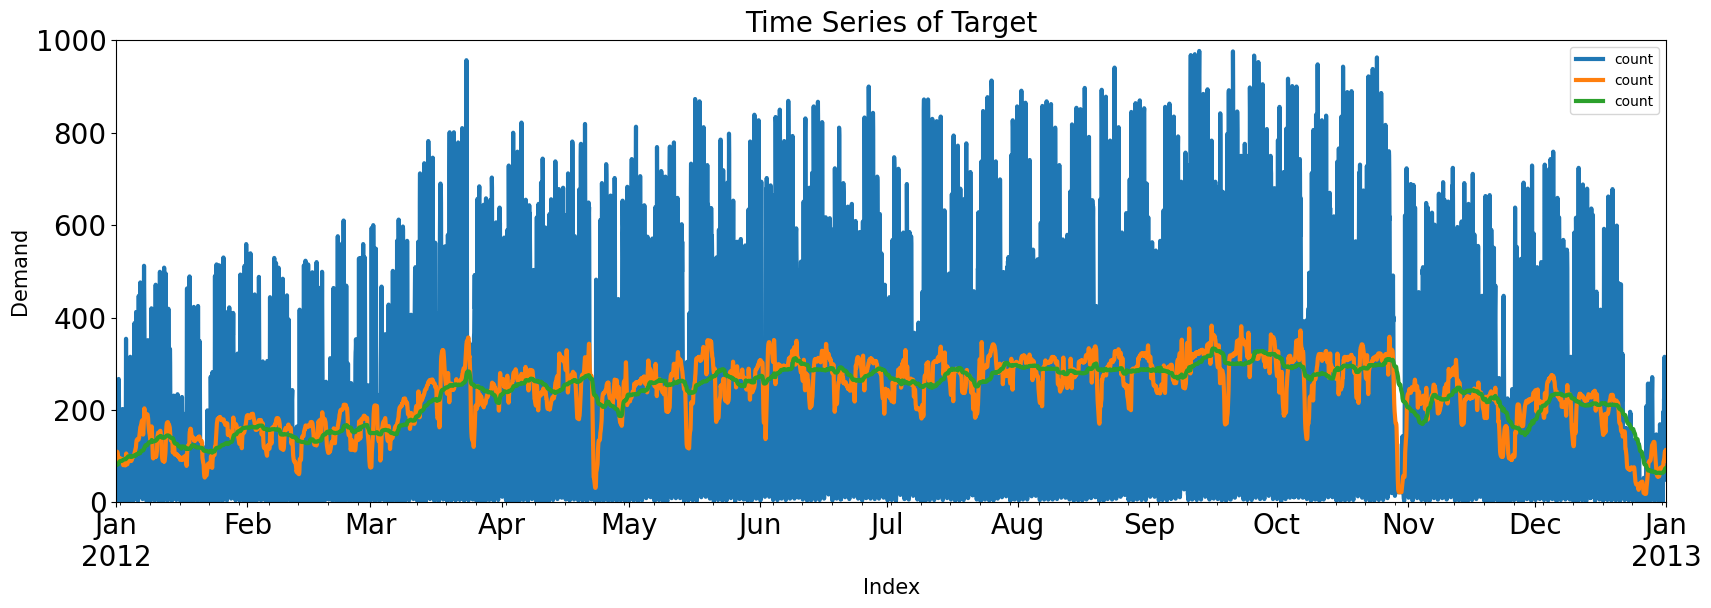

In [120]:
# 시계열 이동평군을 활용하여 일별 주별 평균 데이터 시각화
pd.concat([df[['count']],
          df[['count']].rolling(24).mean(),
          df[['count']].rolling(24 * 7).mean()],axis=1).plot(kind='line', figsize=(20, 6), linewidth=3, fontsize=20,
                                                            xlim=('2012-01-01', '2013-01-01'), ylim=(0, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [121]:
# 추출한 일별 주별 데이터의 nan을 채우고 df와 결합
Y_count_Day = df[['count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']
Y_count_Week = df[['count']].rolling(24 * 7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']
if 'count_Day' not in df.columns:
    df = pd.concat([df, Y_count_Day], axis=1)
if 'count_Week' not in df.columns:
    df = pd.concat([df, Y_count_Week], axis=1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week
DateTime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10


In [122]:
# 종속변수 데이터 확인
df[['count']]

,count
DateTime,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1
...,...
2012-12-31 19:00:00,119
2012-12-31 20:00:00,89
2012-12-31 21:00:00,90


In [123]:
# 종속변수 차분데이터 확인
df[['count']].diff()

,count
DateTime,
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,24.00
2011-01-01 02:00:00,-8.00
2011-01-01 03:00:00,-19.00
2011-01-01 04:00:00,-12.00
...,...
2012-12-31 19:00:00,-3.00
2012-12-31 20:00:00,-30.00
2012-12-31 21:00:00,1.00


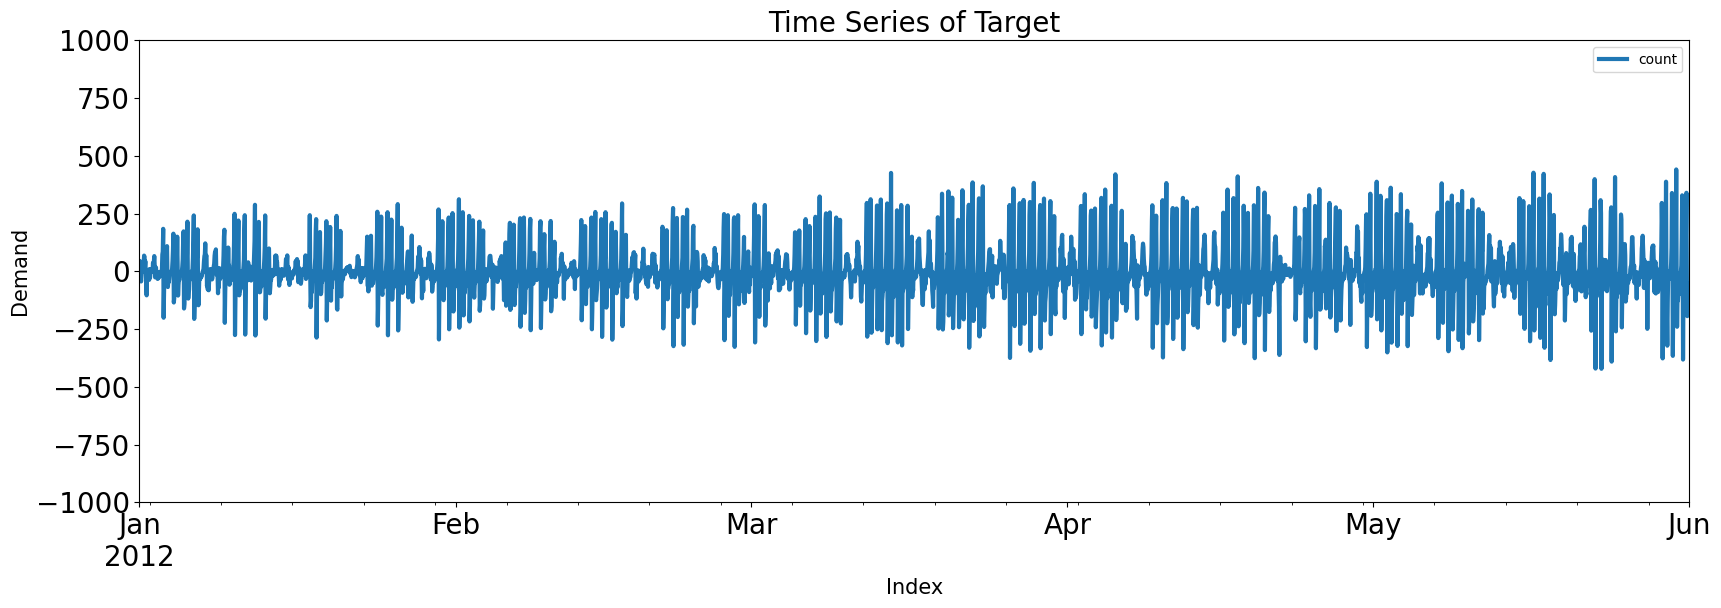

In [124]:
# 종속변수 차분데이터 시각화
df[['count']].diff().plot(kind='line', figsize=(20, 6), linewidth=3, fontsize=20,
                          xlim=('2012-01-01', '2012-06-01'), ylim=(-1000, 1000))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [125]:
# 차분데이터 nan 채우고 df와 결합
Y_diff = df[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']
if 'count_diff' not in df.columns:
    df = pd.concat([df, Y_diff], axis=1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff
DateTime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00


In [126]:
# 추출된 변수들의 특성 확인
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaT,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
temp,"17,544.00",NaN,NaT,NaN,NaT,NaT,20.30,7.92,0.82,13.94,20.50,27.06,41.00
atemp,"17,544.00",NaN,NaT,NaN,NaT,NaT,23.71,8.62,0.00,16.66,24.24,31.06,50.00
humidity,"17,544.00",NaN,NaT,NaN,NaT,NaT,62.87,19.34,0.00,48.00,63.00,79.00,100.00
windspeed,"17,544.00",NaN,NaT,NaN,NaT,NaT,12.81,8.29,0.00,7.00,13.00,17.00,57.00
casual,"17,544.00",NaN,NaT,NaN,NaT,NaT,35.35,49.19,0.00,4.00,16.00,48.00,367.00


In [127]:
# 결측값 확인
df.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
count_trend       0
count_seasonal    0
count_Day         0
count_Week        0
count_diff        0
dtype: int64

#### 8) 지연값(Lagged values, $Lag_t(X_1)$) 

- 변수의 `지연된 값들`로 별도 독립변수를 생성하는 것으로, `ARIMA/VAR/NNAR(Neural Network Autoregression) 등`의 알고리즘도 내부적으로 활용 

<img src='./img/Lag-explanation.PNG' width='400'>

#### 9) 시간변수

- `시간정보`가 담고 있는 년/월/일/요일 등 자체를 `별도 독립적인 변수로 생성` 

#### 10) 요약

- 시계열 구성요소는 각 변수의 `시간패턴을 파악`하는데 중요

- FE를 통해 생성된 `변수의 입력(Input) 형태`로 `알고리즘 선택`시 고려해야

- 생성된 변수의 패턴이 기존 모델에서 반영하지 않던 패턴이라면 `예측 성능을 높임`

- 예측성능 향상 뿐 아니라 `결과를 해석`하고 해당 속성을 분석하며 가능한 `원인 식별에 도움`

In [128]:
# 시간정보 핸들링 위한 함수 확인
df.datetime.dt

In [130]:
# 연도 정보 추출
df.datetime.dt.year

DateTime
2011-01-01 00:00:00    2011
2011-01-01 01:00:00    2011
2011-01-01 02:00:00    2011
2011-01-01 03:00:00    2011
2011-01-01 04:00:00    2011
                       ... 
2012-12-31 19:00:00    2012
2012-12-31 20:00:00    2012
2012-12-31 21:00:00    2012
2012-12-31 22:00:00    2012
2012-12-31 23:00:00    2012
Freq: H, Name: datetime, Length: 17544, dtype: int64

In [133]:
# 요일 정보 추출
df.datetime.dt.dayofweek

DateTime
2011-01-01 00:00:00    5
2011-01-01 01:00:00    5
2011-01-01 02:00:00    5
2011-01-01 03:00:00    5
2011-01-01 04:00:00    5
                      ..
2012-12-31 19:00:00    0
2012-12-31 20:00:00    0
2012-12-31 21:00:00    0
2012-12-31 22:00:00    0
2012-12-31 23:00:00    0
Freq: H, Name: datetime, Length: 17544, dtype: int64

In [134]:
# 연도 및 분기 데이터 추출 생성
df['Year'] = df.datetime.dt.year
df['Quarter'] = df.datetime.dt.quarter
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaT,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
temp,"17,544.00",NaN,NaT,NaN,NaT,NaT,20.30,7.92,0.82,13.94,20.50,27.06,41.00
atemp,"17,544.00",NaN,NaT,NaN,NaT,NaT,23.71,8.62,0.00,16.66,24.24,31.06,50.00
humidity,"17,544.00",NaN,NaT,NaN,NaT,NaT,62.87,19.34,0.00,48.00,63.00,79.00,100.00
windspeed,"17,544.00",NaN,NaT,NaN,NaT,NaT,12.81,8.29,0.00,7.00,13.00,17.00,57.00
casual,"17,544.00",NaN,NaT,NaN,NaT,NaT,35.35,49.19,0.00,4.00,16.00,48.00,367.00


In [137]:
# 분기 데이터 재생성
# 시간 흐름에 따라 증가하는 변수 생성 목적
df['Quarter_ver2'] = df['Quarter'] + (df.Year - df.Year.min()) * 4
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,Year,Quarter,Quarter_ver2
DateTime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,2011,1,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,2011,1,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,2011,1,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,2011,1,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00,2012,4,8
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00,2012,4,8
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00,2012,4,8


In [138]:
# 월 일 시간 요일 추출 생성
df['Month'] = df.datetime.dt.month
df['Day'] = df.datetime.dt.day
df['Hour'] = df.datetime.dt.hour
df['DayofWeek'] = df.datetime.dt.dayofweek
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_Day,count_Week,count_diff,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,41.04,56.11,24.00,2011,1,1,1,1,0,5
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,41.04,56.11,24.00,2011,1,1,1,1,1,5
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,41.04,56.11,-8.00,2011,1,1,1,1,2,5
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,41.04,56.11,-19.00,2011,1,1,1,1,3,5
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,41.04,56.11,-12.00,2011,1,1,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,110.17,73.30,-3.00,2012,4,8,12,31,19,0
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,110.88,73.70,-30.00,2012,4,8,12,31,20,0
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,112.67,74.10,1.00,2012,4,8,12,31,21,0


In [139]:
# 추출변수들의 특성 확인
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaT,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Quarter_ver2,"17,544.00",NaN,NaT,NaN,NaT,NaT,4.51,2.29,1.00,3.00,5.00,7.00,8.00
Month,"17,544.00",NaN,NaT,NaN,NaT,NaT,6.52,3.45,1.00,4.00,7.00,10.00,12.00
Day,"17,544.00",NaN,NaT,NaN,NaT,NaT,15.74,8.80,1.00,8.00,16.00,23.00,31.00
Hour,"17,544.00",NaN,NaT,NaN,NaT,NaT,11.51,6.94,0.00,5.00,12.00,17.25,23.00


In [140]:
# 지연값 생성
# 지연시킬 방향에 주의해야
df['count'].shift(1)

DateTime
2011-01-01 00:00:00      NaN
2011-01-01 01:00:00    16.00
2011-01-01 02:00:00    40.00
2011-01-01 03:00:00    32.00
2011-01-01 04:00:00    13.00
                       ...  
2012-12-31 19:00:00   122.00
2012-12-31 20:00:00   119.00
2012-12-31 21:00:00    89.00
2012-12-31 22:00:00    90.00
2012-12-31 23:00:00    61.00
Freq: H, Name: count, Length: 17544, dtype: float64

In [142]:
# 지연값 생성
df['count'].shift(1)
# df['count'].shift(-1)

DateTime
2011-01-01 00:00:00      NaN
2011-01-01 01:00:00    16.00
2011-01-01 02:00:00    40.00
2011-01-01 03:00:00    32.00
2011-01-01 04:00:00    13.00
                       ...  
2012-12-31 19:00:00   122.00
2012-12-31 20:00:00   119.00
2012-12-31 21:00:00    89.00
2012-12-31 22:00:00    90.00
2012-12-31 23:00:00    61.00
Freq: H, Name: count, Length: 17544, dtype: float64

In [143]:
# 지연값 변수 추출생성
df['count_lag1'] = df['count'].shift(1)
df['count_lag2'] = df['count'].shift(2)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_diff,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,24.00,2011,1,1,1,1,0,5,NaN,NaN
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,24.00,2011,1,1,1,1,1,5,16.00,NaN
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,-8.00,2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,-19.00,2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,-12.00,2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,-3.00,2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,-30.00,2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,1.00,2012,4,8,12,31,21,0,89.00,119.00


In [144]:
# 추출 변수의 특성 확인
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,"17,544.00",2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",1.43,0.65,1.00,1.00,1.00,2.00,4.00
temp,"17,544.00",20.30,7.92,0.82,13.94,20.50,27.06,41.00
...,...,...,...,...,...,...,...,...
Day,"17,544.00",15.74,8.80,1.00,8.00,16.00,23.00,31.00
Hour,"17,544.00",11.51,6.94,0.00,5.00,12.00,17.25,23.00
DayofWeek,"17,544.00",3.00,2.01,0.00,1.00,3.00,5.00,6.00
count_lag1,"17,543.00",187.80,181.35,1.00,38.00,140.00,279.00,977.00


In [145]:
# 지연값에서 nan 제거
# df['count_lag2'].fillna(method='bfill')
# df['count_lag2'].fillna(method='ffill')
df['count_lag2'].fillna(0)

DateTime
2011-01-01 00:00:00     0.00
2011-01-01 01:00:00     0.00
2011-01-01 02:00:00    16.00
2011-01-01 03:00:00    40.00
2011-01-01 04:00:00    32.00
                       ...  
2012-12-31 19:00:00   164.00
2012-12-31 20:00:00   122.00
2012-12-31 21:00:00   119.00
2012-12-31 22:00:00    89.00
2012-12-31 23:00:00    90.00
Freq: H, Name: count_lag2, Length: 17544, dtype: float64

In [146]:
# 지연값에서 nan 제거 후 저장
df['count_lag1'].fillna(method='bfill', inplace=True)
df['count_lag2'].fillna(method='bfill', inplace=True)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count_diff,Year,Quarter,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,24.00,2011,1,1,1,1,0,5,16.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,24.00,2011,1,1,1,1,1,5,16.00,16.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,-8.00,2011,1,1,1,1,2,5,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,-19.00,2011,1,1,1,1,3,5,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,-12.00,2011,1,1,1,1,4,5,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,-3.00,2012,4,8,12,31,19,0,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,-30.00,2012,4,8,12,31,20,0,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,1.00,2012,4,8,12,31,21,0,89.00,119.00


In [152]:
# 분기 변수의 더미변수 생성 및 df와 결합
pd.get_dummies(df['Quarter'])
pd.get_dummies(df['Quarter'], prefix='Quarter_Dummy')
pd.get_dummies(df['Quarter'], prefix='Quarter_Dummy', drop_first=True)
pd.concat([df, pd.get_dummies(df['Quarter'], prefix='Quarter_Dummy', drop_first=True)], axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


In [154]:
# 분기 변수의 더미변수 생성 및 df와 결합
if 'Quarter' in df.columns:
    df = pd.concat([df, pd.get_dummies(df['Quarter'], prefix='Quarter_Dummy', drop_first=True)], axis=1)
    del df['Quarter']
df 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


### Code Summary

In [156]:
# 시계열 변수추출
## 날짜인식 및 빈도 설정만
def non_feature_engineering(df):
    df_nfe = df.copy()
    if 'datetime' in df_nfe.columns:
        df_nfe['datetime'] = pd.to_datetime(df_nfe['datetime'])
        df_nfe['DateTime'] = pd.to_datetime(df_nfe['datetime'])
    if df_nfe.index.dtype == 'int64':
        df_nfe.set_index('DateTime', inplace=True)
    df_nfe = df_nfe.asfreq('H', method='ffill')

    return df_nfe


## 날짜인식 및 빈도 설정을 포함한 모든 전처리
def feature_engineering(df):
    df_fe = df.copy()
    if 'datetime' in df_fe.columns:
        df_fe['datetime'] = pd.to_datetime(df_fe['datetime'])
        df_fe['DateTime'] = pd.to_datetime(df_fe['datetime'])
    if df_fe.index.dtype == 'int64':
        df_fe.set_index('DateTime', inplace=True)

    df_fe = df_fe.asfreq('H', method='ffill')

    result = sm.tsa.seasonal_decompose(df_fe['count'], model='additive')
    Y_trend = pd.DataFrame(result.trend)
    Y_trend.fillna(method='ffill', inplace=True)
    Y_trend.fillna(method='bfill', inplace=True)
    Y_trend.columns = ['count_trend']
    Y_seasonal = pd.DataFrame(result.seasonal)
    Y_seasonal.fillna(method='ffill', inplace=True)
    Y_seasonal.fillna(method='bfill', inplace=True)
    Y_seasonal.columns = ['count_seasonal']
    pd.concat([df_fe, Y_trend, Y_seasonal], axis=1).isnull().sum()
    if 'count_trend' not in df_fe.columns:
        df_fe = pd.concat([df_fe, Y_trend, Y_seasonal], axis=1)
    
    Y_count_Day = df_fe[['count']].rolling(24).mean()
    Y_count_Day.fillna(method='ffill', inplace=True)
    Y_count_Day.fillna(method='bfill', inplace=True)
    Y_count_Day.columns = ['count_Day']
    Y_count_Week = df_fe[['count']].rolling(24 * 7).mean()
    Y_count_Week.fillna(method='ffill', inplace=True)
    Y_count_Week.fillna(method='bfill', inplace=True)
    Y_count_Week.columns = ['count_Week']
    if 'count_Day' not in df_fe.columns:
        df_fe = pd.concat([df_fe, Y_count_Day], axis=1)
    if 'count_Week' not in df_fe.columns:
        df_fe = pd.concat([df_fe, Y_count_Week], axis=1)
    
    Y_diff = df_fe[['count']].diff()
    Y_diff.fillna(method='ffill', inplace=True)
    Y_diff.fillna(method='bfill', inplace=True)
    Y_diff.columns = ['count_diff']
    if 'count_diff' not in df_fe.columns:
        df_fe = pd.concat([df_fe, Y_diff], axis=1)
    
    df_fe['Year'] = df_fe.datetime.dt.year
    df_fe['Quarter'] = df_fe.datetime.dt.quarter
    df_fe['Quarter_ver2'] = df_fe['Quarter'] + (df_fe.Year - df_fe.Year.min()) * 4
    df_fe['Month'] = df_fe.datetime.dt.month
    df_fe['Day'] = df_fe.datetime.dt.day
    df_fe['Hour'] = df_fe.datetime.dt.hour
    df_fe['DayofWeek'] = df_fe.datetime.dt.dayofweek

    df_fe['count_lag1'] = df_fe['count'].shift(1)
    df_fe['count_lag2'] = df_fe['count'].shift(2)
    df_fe['count_lag1'].fillna(method='bfill', inplace=True)
    df_fe['count_lag2'].fillna(method='bfill', inplace=True)

    if 'Quarter' in df_fe.columns:
        if 'Quarter_Dummy' not in ['_'.join(col.split('_')[:2]) for col in df_fe.columns]:
            df_fe = pd.concat([df_fe, pd.get_dummies(df_fe['Quarter'], prefix='Quarter_Dummy', drop_first=True)], axis=1)
            del df_fe['Quarter']
    return df_fe

In [158]:
# 데이터 로딩
location = os.path.join('.', 'data', 'Bike_Sharing_Demand_Full.csv')
df = pd.read_csv(location)

# 데이터 전처리
df_nfe = non_feature_engineering(df)
df_fe = feature_engineering(df)

In [159]:
# 결과 비교
display(df_nfe, df_fe)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
DateTime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,...,8,12,31,19,0,122.00,164.00,0,0,1
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,...,8,12,31,20,0,119.00,122.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


## 시각화로 추출변수가 Y예측에 도움될지 확인

In [160]:
# 전처리 이후 데이터 특징 확인
df_fe.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,17544,17379,2012-10-29,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,"17,544.00",NaN,NaT,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,"17,544.00",NaN,NaT,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
count_lag1,"17,544.00",NaN,NaT,NaN,NaT,NaT,187.79,181.35,1.00,38.00,140.00,279.00,977.00
count_lag2,"17,544.00",NaN,NaT,NaN,NaT,NaT,187.79,181.35,1.00,38.00,140.00,279.00,977.00
Quarter_Dummy_2,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,0.00,1.00
Quarter_Dummy_3,"17,544.00",NaN,NaT,NaN,NaT,NaT,0.25,0.43,0.00,0.00,0.00,1.00,1.00


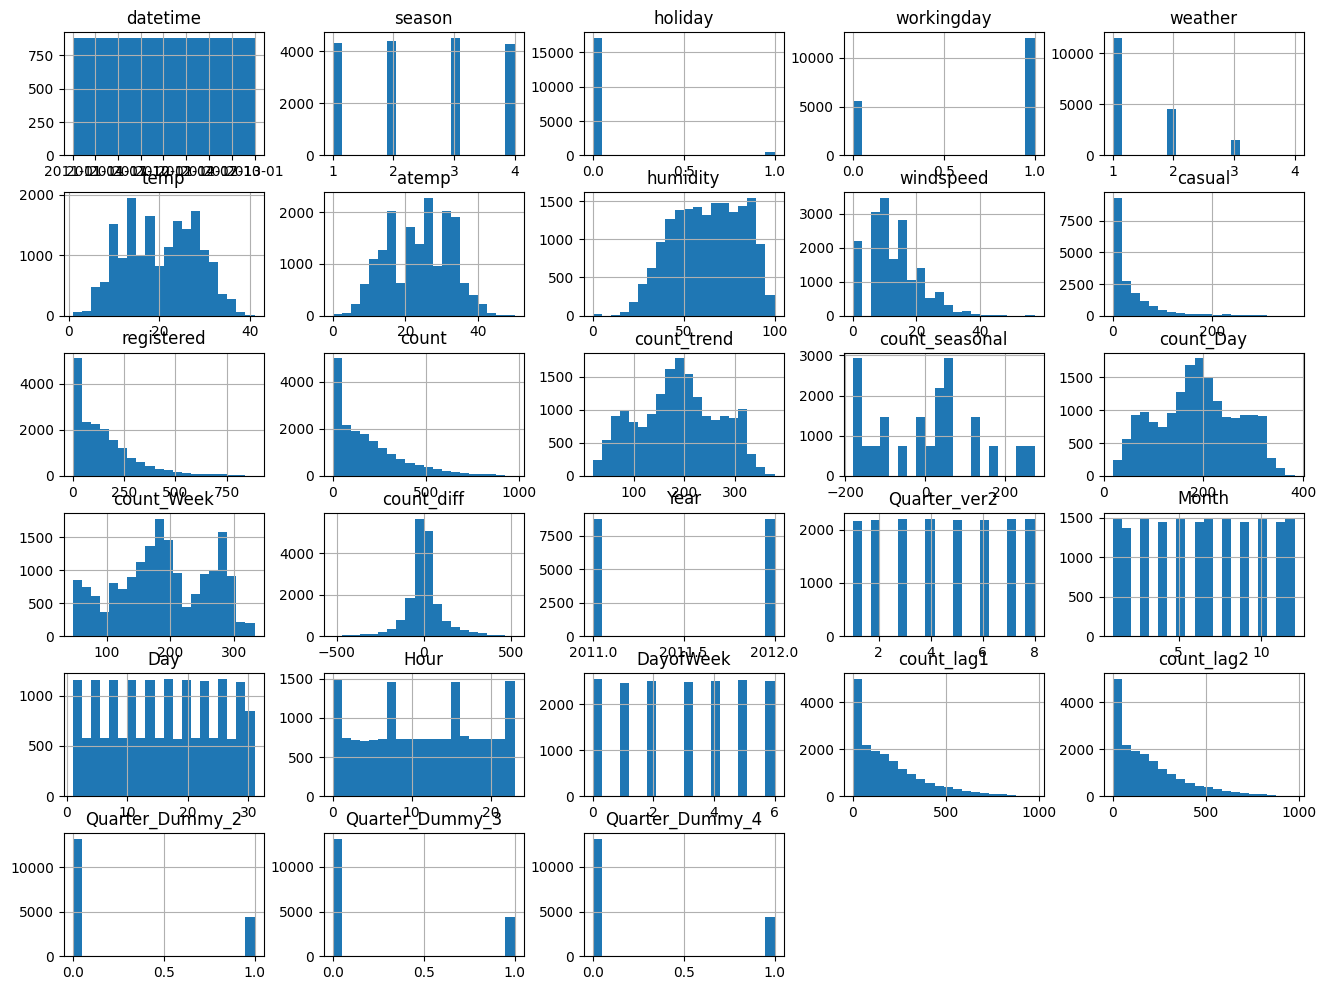

In [161]:
# 변수들의 히스토그램 확인
df_fe.hist(bins=20, grid=True, figsize=(16, 12))
plt.show()

(0.0, 1000.0)

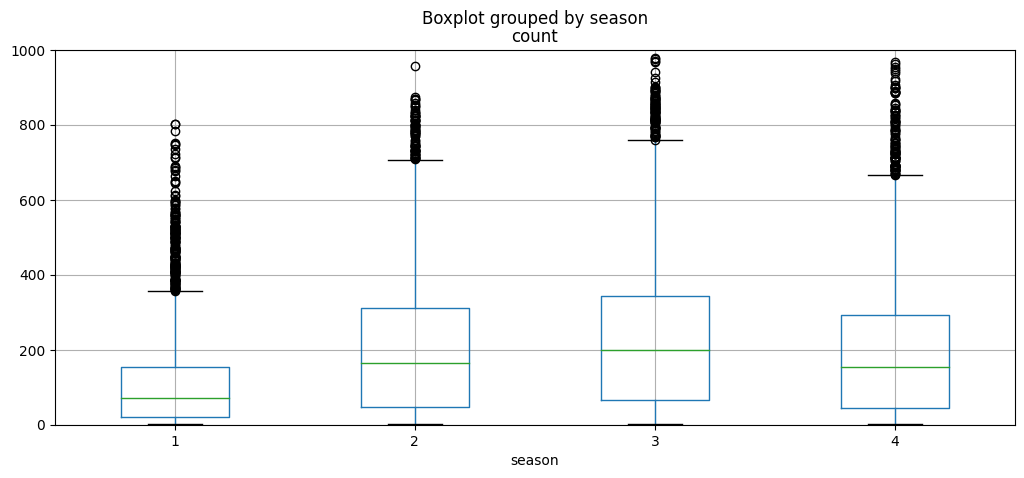

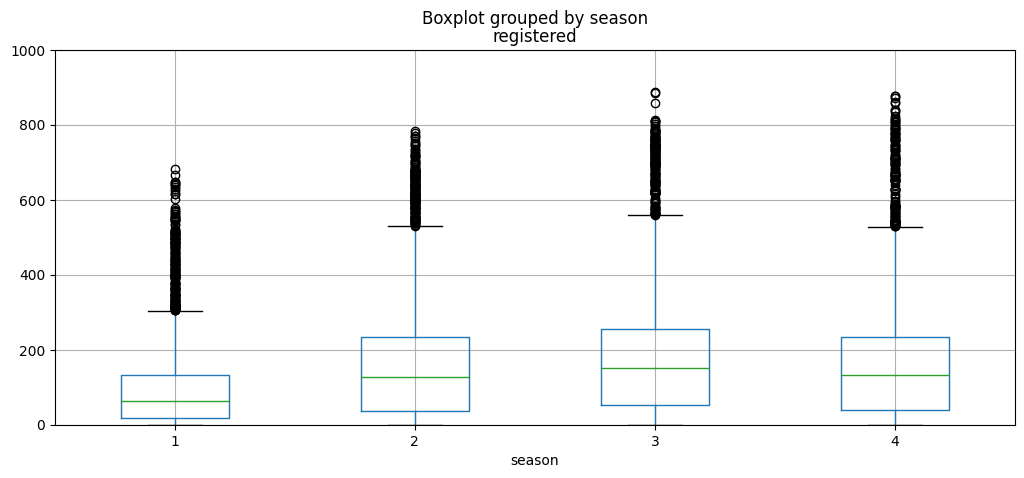

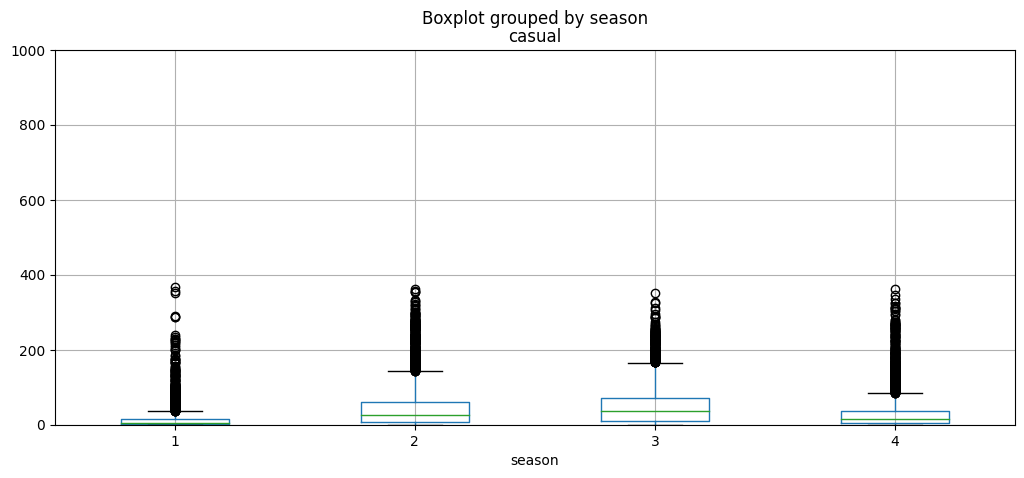

In [162]:
# 계절별 종속변수 분포 확인
df_fe.boxplot(column='count', by='season', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)
df_fe.boxplot(column='registered', by='season', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)
df_fe.boxplot(column='casual', by='season', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)

(0.0, 1000.0)

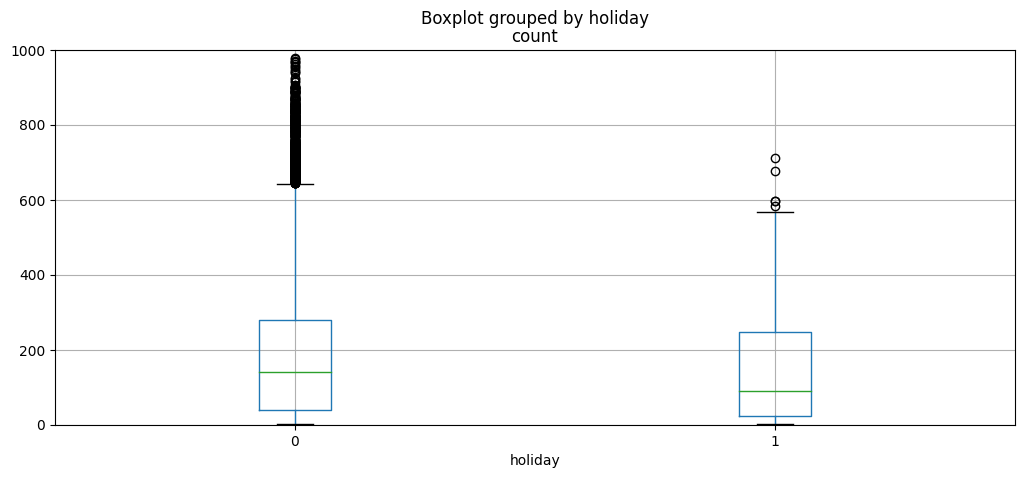

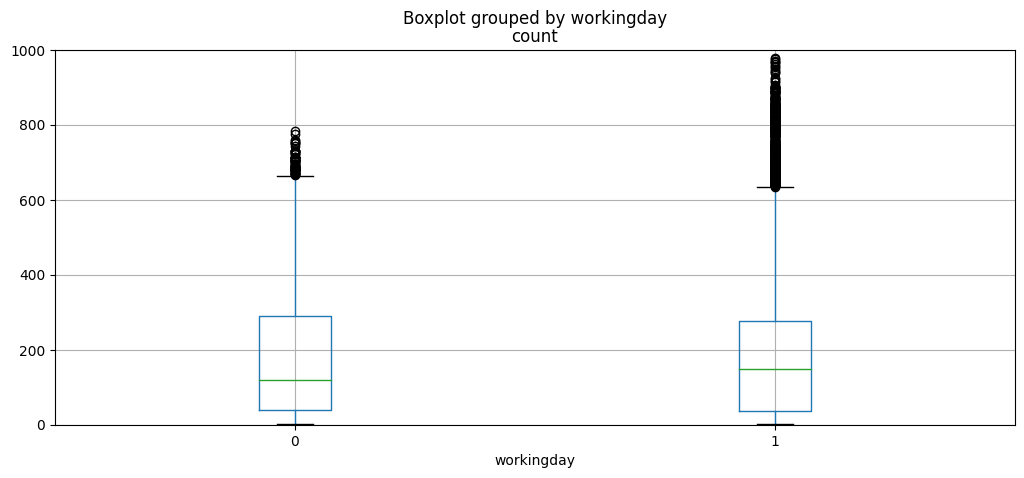

In [163]:
# 주말과 근무일별 종속변수 분포 확인
df_fe.boxplot(column='count', by='holiday', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)
df_fe.boxplot(column='count', by='workingday', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)

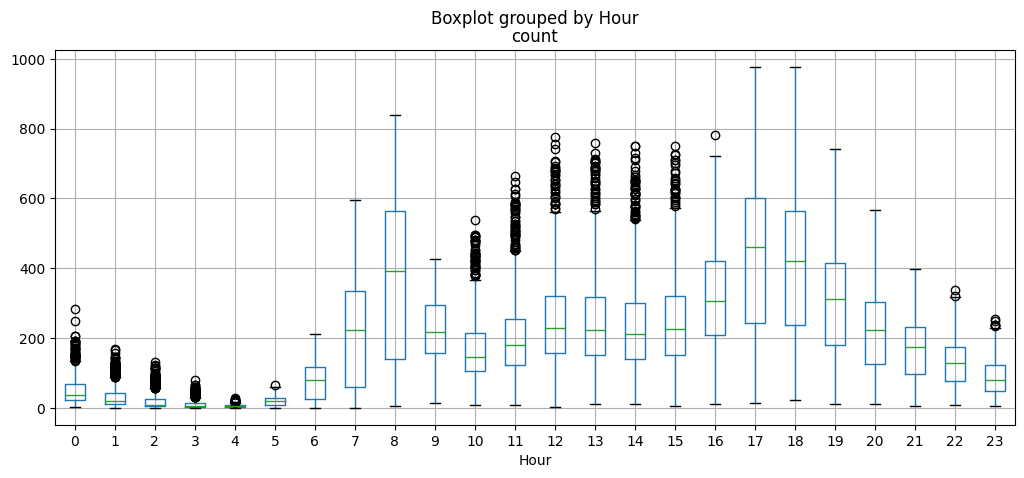

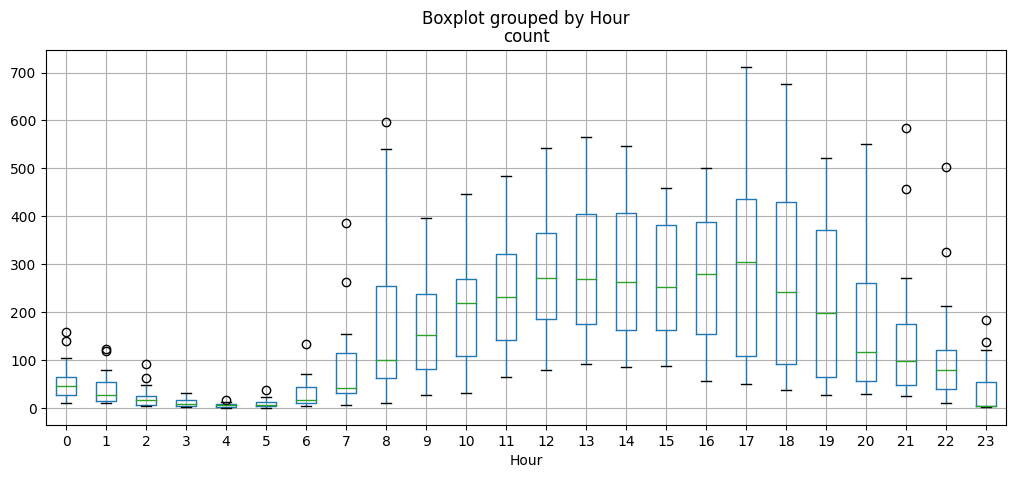

In [164]:
# 주말 여부에 따른 시간별 종속변수 분포 확인
df_fe[df_fe.holiday == 0].boxplot(column='count', by='Hour', grid=True, figsize=(12, 5))
plt.show()
df_fe[df_fe.holiday == 1].boxplot(column='count', by='Hour', grid=True, figsize=(12, 5))
plt.show()

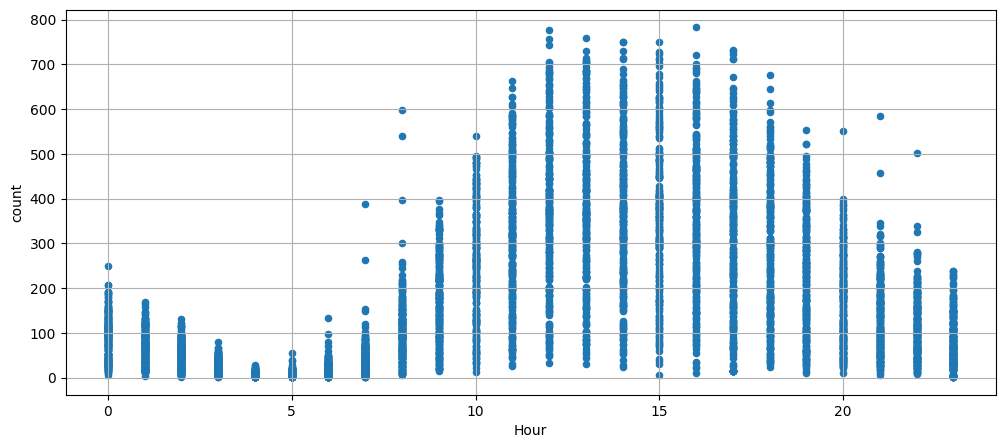

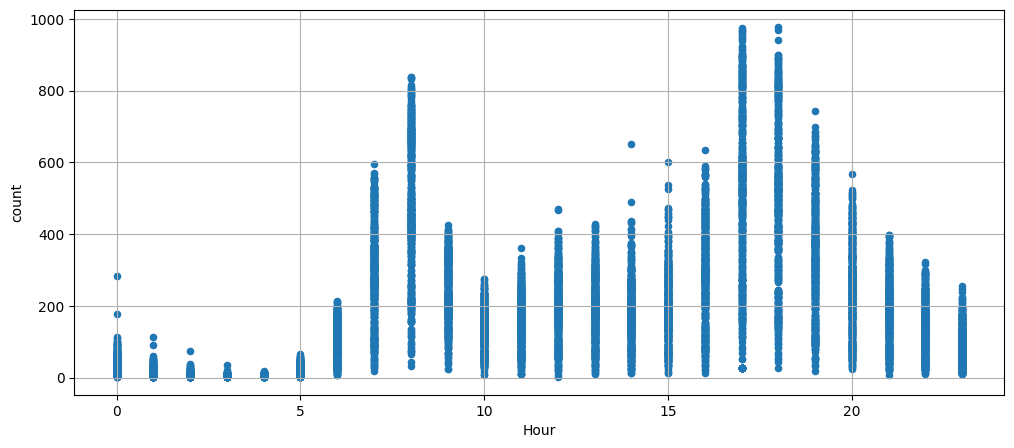

In [167]:
# 근무일 여부에 따른 시간별 종속변수 분포 확인
df_fe[df_fe.workingday == 0].plot.scatter(y='count', x='Hour', grid=True, figsize=(12, 5))
plt.show()
df_fe[df_fe.workingday == 1].plot.scatter(y='count', x='Hour', grid=True, figsize=(12, 5))
plt.show() 

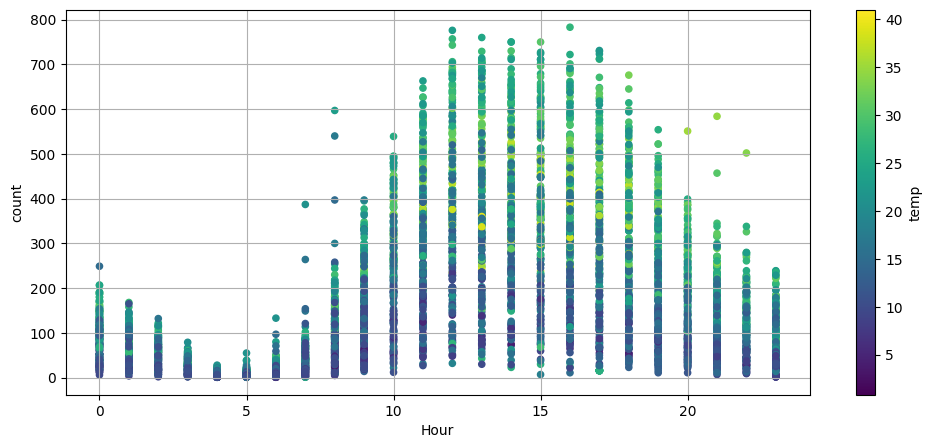

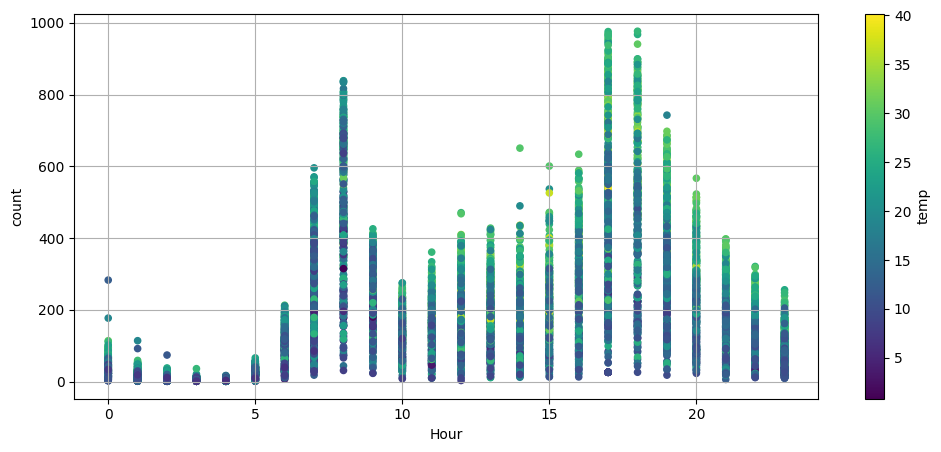

In [168]:
# 근무일 여부에 따른 시간별 온도별 종속변수 분포 확인
df_fe[df_fe.workingday == 0].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12, 5))
plt.show()
df_fe[df_fe.workingday == 1].plot.scatter(y='count', x='Hour', c='temp', grid=True, figsize=(12, 5))
plt.show()

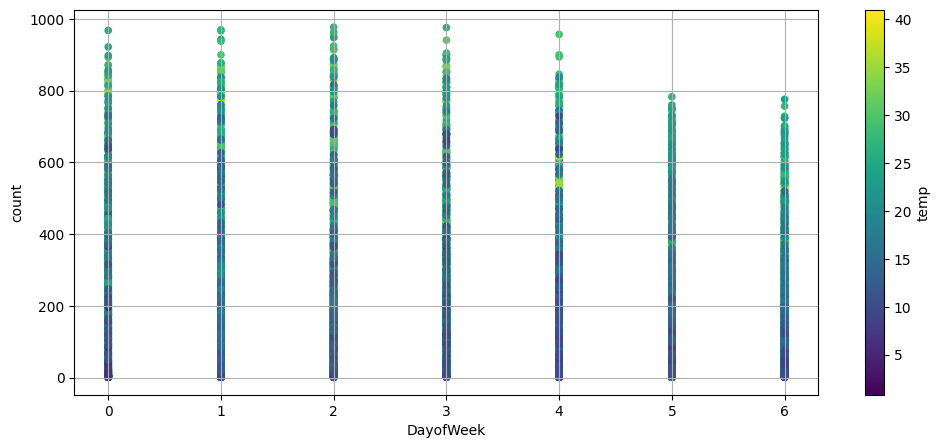

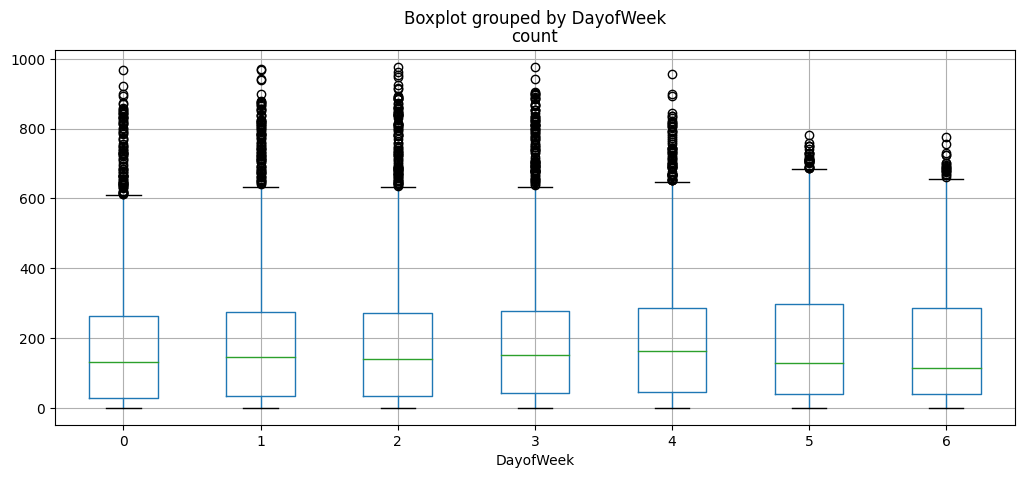

In [169]:
# 요일별 종속변수 분포 확인
df_fe.plot.scatter(y='count', x='DayofWeek', grid=True, figsize=(12, 5), c='temp', colormap='viridis')
plt.show()
df_fe.boxplot(column='count', by='DayofWeek', grid=True, figsize=(12, 5))
plt.show()

(0.0, 1000.0)

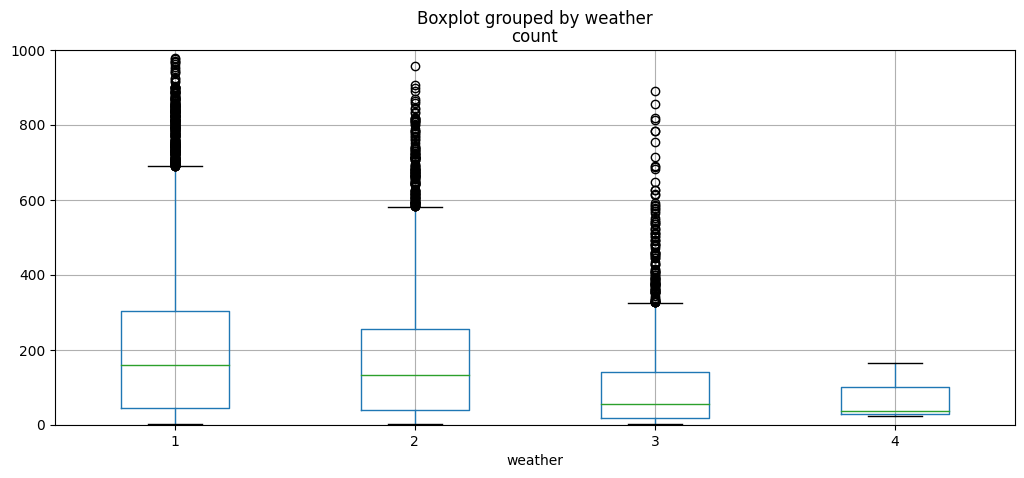

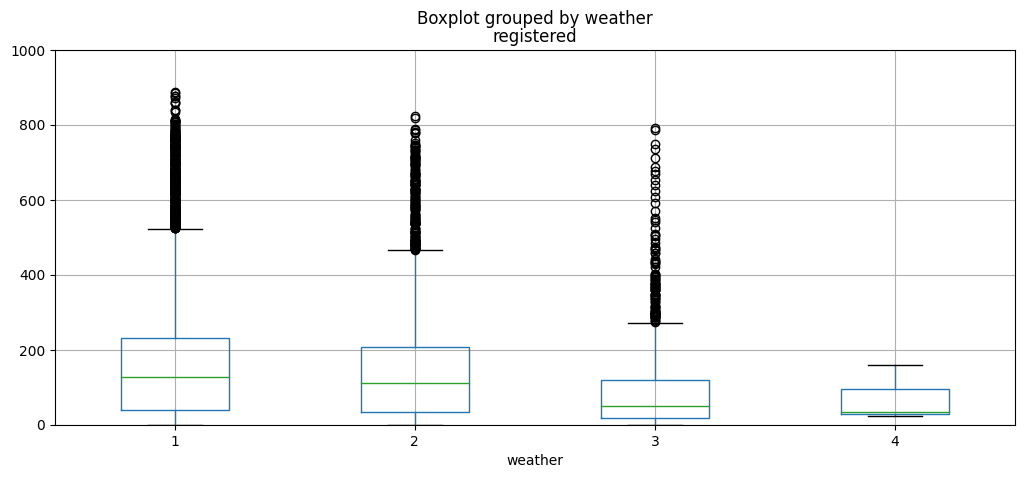

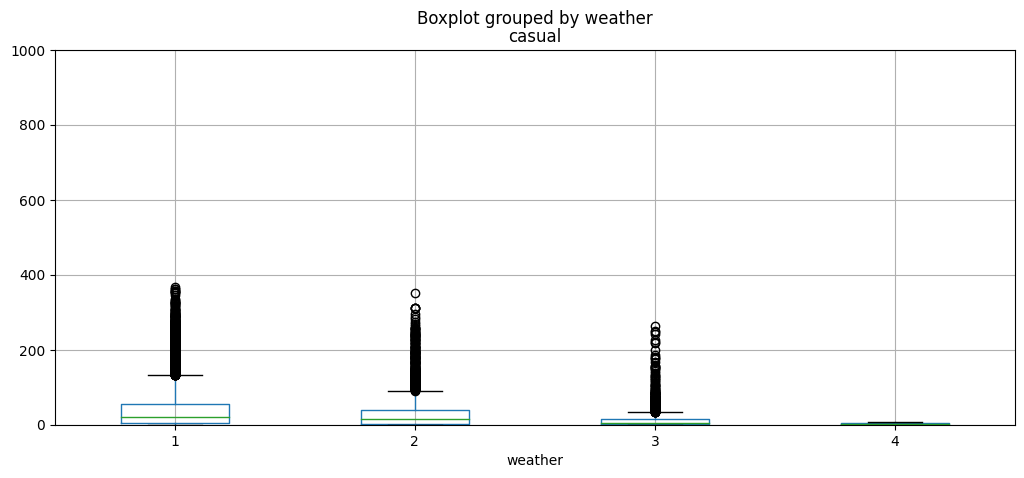

In [170]:
# 날씨별 종속변수 후본군 분포 확인
df_fe.boxplot(column='count', by='weather', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)
df_fe.boxplot(column='registered', by='weather', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)
df_fe.boxplot(column='casual', by='weather', grid=True, figsize=(12, 5))
plt.ylim(0, 1000)

- 다른 관점에서의 시각화를 위해 별도 DataFrame 생성

In [172]:
# 날씨 변수의 히스토그램 분포 확인
df_fe['weather'].value_counts()

1    11455
2     4563
3     1523
4        3
Name: weather, dtype: int64

In [173]:
# 날씨 변수의 히스토그램 분포비율 확인
pd.DataFrame(df_fe['weather'].value_counts() / df_fe['weather'].value_counts().sum() * 100).T

,1,2,3,4
weather,65.29,26.01,8.68,0.02


In [174]:
# 날씨별 종속변수의 히스토그램 분포 확인
pd.crosstab(index=df_fe['count'], columns=df_fe['weather'], margins=True)

weather,1,2,3,4,All
count,,,,,
1,100,45,27,0,172
2,136,59,37,0,232
3,136,66,41,0,243
4,149,62,36,0,247
5,164,63,36,0,263
...,...,...,...,...,...
968,1,0,0,0,1
970,1,0,0,0,1
976,1,0,0,0,1


In [175]:
# 날씨별 종속변수의 히스토그램 분포비율 확인
sub_table = pd.crosstab(index=df_fe['count'], columns=df_fe['weather'], margins=True)
sub_table / sub_table.loc['All', 'All'] * 100

weather,1,2,3,4,All
count,,,,,
1,0.57,0.26,0.15,0.00,0.98
2,0.78,0.34,0.21,0.00,1.32
3,0.78,0.38,0.23,0.00,1.39
4,0.85,0.35,0.21,0.00,1.41
5,0.93,0.36,0.21,0.00,1.50
...,...,...,...,...,...
968,0.01,0.00,0.00,0.00,0.01
970,0.01,0.00,0.00,0.00,0.01
976,0.01,0.00,0.00,0.00,0.01


In [176]:
# 날씨와 요일을 index로 그룹핑하여 변수별 평균 계산
# df_fe.groupby(['weather', 'DayofWeek']).count()
df_fe.groupby(['weather', 'DayofWeek']).mean()


season  holiday  workingday  temp  atemp  humidity  \
weather DayofWeek                                                       
1       0            2.45     0.14        0.86 20.70  24.23     59.05   
        1            2.48     0.00        1.00 21.36  24.89     57.11   
        2            2.50     0.01        0.99 21.61  25.08     58.23   
        3            2.53     0.03        0.97 21.35  24.88     55.85   
        4            2.56     0.03        0.97 20.71  24.00     57.06   
...                   ...      ...         ...   ...    ...       ...   
3       5            2.31     0.00        0.00 17.50  20.48     86.43   
        6            2.62     0.00        0.00 19.17  22.40     81.39   
4       0            1.00     0.00        1.00  8.20  11.37     86.00   
        2            1.00     0.00        1.00  9.02   9.85     93.00   
        5            1.00     0.00        0.00  5.74   6.82     86.00   

                   windspeed  casual  registered  count  ...     Year  \
weather DayofWeek                                        ...            
1       0              12.86   30.40      160.04 190.43  ... 2,011.49   
        1              12.95   27.57      186.58 214.14  ... 2,011.51   
        2              12.22   26.65      181.52 208.17  ... 2,011.53   
        3              13.01   28.95      184.81 213.77  ... 2,011.54   
        4              12.73   33.50      168.64 202.14  ... 2,011.49   
...                      ...     ...         ...    ...  ...      ...   
3       5              18.08   26.43       70.57  97.00  ... 2,011.46   
        6              16.12   31.76       84.02 115.78  ... 2,011.58   
4       0               6.00    6.00      158.00 164.00  ... 2,012.00   
        2              22.00    1.00       35.00  36.00  ... 2,011.00   
        5              13.00    1.00       22.00  23.00  ... 2,012.00   

                   Quarter_ver2  Month   Day  Hour  count_lag1  count_lag2  \
weather DayofWeek                                                            
1       0                  4.42   6.36 15.64 11.39      188.77      188.68   
        1                  4.48   6.22 16.16 12.17      213.34      213.59   
        2                  4.59   6.41 15.86 11.60      207.08      209.14   
        3                  4.64   6.51 15.01 11.90      213.36      214.26   
        4                  4.52   6.71 15.41 11.57      203.38      204.10   
...                         ...    ...   ...   ...         ...         ...   
3       5                  4.15   5.71 16.32 12.18      109.89      120.54   
        6                  4.87   6.46 14.36 13.77      143.89      166.62   
4       0                  5.00   1.00  9.00 18.00      152.00       49.00   
        2                  1.00   1.00 26.00 16.00       43.00       36.00   
        5                  5.00   1.00 21.00  1.00       24.00       38.00   

                   Quarter_Dummy_2  Quarter_Dummy_3  Quarter_Dummy_4  
weather DayofWeek                                                     
1       0                     0.25             0.27             0.22  
        1                     0.24             0.30             0.20  
        2                     0.27             0.30             0.20  
        3                     0.28             0.28             0.22  
        4                     0.28             0.25             0.26  
...                            ...              ...              ...  
3       5                     0.21             0.30             0.17  
        6                     0.25             0.28             0.25  
4       0                     0.00             0.00             0.00  
        2                     0.00             0.00             0.00  
        5                     0.00             0.00             0.00  

[24 rows x 25 columns]

In [177]:
# 날짜와 요일을 index로 그룹핑하여 변수별 기초통계 계산
df_fe.groupby(['weather', 'DayofWeek']).describe()

season                                     holiday       \
                     count mean  std  min  25%  50%  75%  max    count mean   
weather DayofWeek                                                             
1       0         1,594.00 2.45 1.09 1.00 1.00 2.00 3.00 4.00 1,594.00 0.14   
        1         1,527.00 2.48 1.07 1.00 2.00 3.00 3.00 4.00 1,527.00 0.00   
        2         1,577.00 2.50 1.06 1.00 2.00 3.00 3.00 4.00 1,577.00 0.01   
        3         1,660.00 2.53 1.06 1.00 2.00 3.00 3.00 4.00 1,660.00 0.03   
        4         1,649.00 2.56 1.08 1.00 2.00 3.00 4.00 4.00 1,649.00 0.03   
...                    ...  ...  ...  ...  ...  ...  ...  ...      ...  ...   
3       5           201.00 2.31 1.04 1.00 1.00 2.00 3.00 4.00   201.00 0.00   
        6           170.00 2.62 1.08 1.00 2.00 3.00 4.00 4.00   170.00 0.00   
4       0             1.00 1.00  NaN 1.00 1.00 1.00 1.00 1.00     1.00 0.00   
        2             1.00 1.00  NaN 1.00 1.00 1.00 1.00 1.00     1.00 0.00   
        5             1.00 1.00  NaN 1.00 1.00 1.00 1.00 1.00     1.00 0.00   

                   ... Quarter_Dummy_3      Quarter_Dummy_4                 \
                   ...             75%  max           count mean  std  min   
weather DayofWeek  ...                                                       
1       0          ...            1.00 1.00        1,594.00 0.22 0.42 0.00   
        1          ...            1.00 1.00        1,527.00 0.20 0.40 0.00   
        2          ...            1.00 1.00        1,577.00 0.20 0.40 0.00   
        3          ...            1.00 1.00        1,660.00 0.22 0.42 0.00   
        4          ...            1.00 1.00        1,649.00 0.26 0.44 0.00   
...                ...             ...  ...             ...  ...  ...  ...   
3       5          ...            1.00 1.00          201.00 0.17 0.38 0.00   
        6          ...            1.00 1.00          170.00 0.25 0.43 0.00   
4       0          ...            0.00 0.00            1.00 0.00  NaN 0.00   
        2          ...            0.00 0.00            1.00 0.00  NaN 0.00   
        5          ...            0.00 0.00            1.00 0.00  NaN 0.00   

                                       
                   25%  50%  75%  max  
weather DayofWeek                      
1       0         0.00 0.00 0.00 1.00  
        1         0.00 0.00 0.00 1.00  
        2         0.00 0.00 0.00 1.00  
        3         0.00 0.00 0.00 1.00  
        4         0.00 0.00 1.00 1.00  
...                ...  ...  ...  ...  
3       5         0.00 0.00 0.00 1.00  
        6         0.00 0.00 0.00 1.00  
4       0         0.00 0.00 0.00 0.00  
        2         0.00 0.00 0.00 0.00  
        5         0.00 0.00 0.00 0.00  

[24 rows x 200 columns]

In [178]:
# 날씨와 요일을 index로 그룹핑하여 특정 변수의 기초통계 계산
df_fe.groupby(['weather', 'DayofWeek']).agg({'count' : [sum, min, max]})

count          
                      sum  min  max
weather DayofWeek                  
1       0          303551    1  968
        1          326993    1  970
        2          328285    1  977
        3          354852    1  976
        4          333333    1  900
...                   ...  ...  ...
3       5           19498    1  584
        6           19683    1  626
4       0             164  164  164
        2              36   36   36
        5              23   23   23

[24 rows x 3 columns]

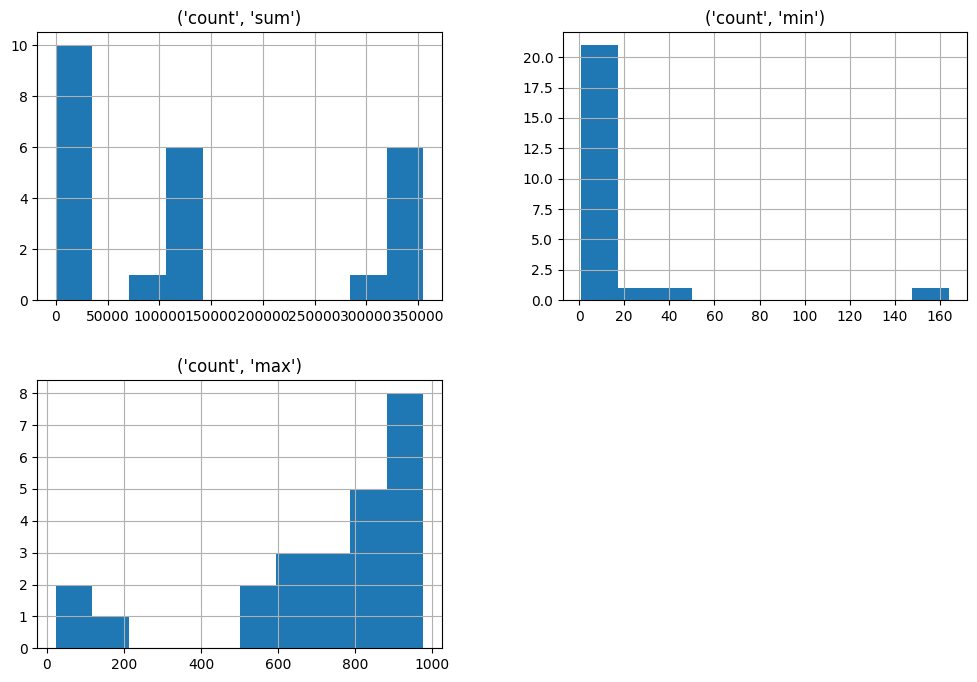

In [179]:
# 날씨와 요일을 index로 그룹필하여 특정 변수의 통계량 시각화
df_fe.groupby(['weather', 'DayofWeek']).agg({'count' : [sum, min, max]}).hist(grid=True, figsize=(12, 8))
plt.show()

In [180]:
# 날씨로 index로 그룹핑 결과는 dictionary로 저장 확인
for key, item in df_fe.groupby('weather'):
    display(key, item)

1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 07:00:00,2012-12-31 07:00:00,1,0,1,1,6.56,9.09,64,9.00,2,...,8,12,31,7,0,40.00,9.00,0,0,1
2012-12-31 08:00:00,2012-12-31 08:00:00,1,0,1,1,5.74,7.58,69,9.00,9,...,8,12,31,8,0,85.00,40.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,1,1,5,5,1.00,13.00,0,0,0
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,1,1,13,5,84.00,56.00,0,0,0
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,1,1,14,5,94.00,84.00,0,0,0
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,1,1,15,5,106.00,94.00,0,0,0
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,1,1,16,5,110.00,106.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 16:00:00,2012-12-31 16:00:00,1,0,1,2,10.66,12.88,48,13.00,30,...,8,12,31,16,0,315.00,247.00,0,0,1
2012-12-31 17:00:00,2012-12-31 17:00:00,1,0,1,2,10.66,14.39,48,6.00,14,...,8,12,31,17,0,214.00,315.00,0,0,1
2012-12-31 18:00:00,2012-12-31 18:00:00,1,0,1,2,10.66,13.63,48,9.00,10,...,8,12,31,18,0,164.00,214.00,0,0,1


3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,1,1,18,5,67.00,93.00,0,0,0
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,1,1,19,5,35.00,67.00,0,0,0
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,1,1,2,6,6,3.00,3.00,0,0,0
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,1,1,2,8,6,1.00,2.00,0,0,0
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,1,1,2,14,6,75.00,93.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27 01:00:00,2012-12-27 01:00:00,1,0,1,3,9.84,9.85,93,30.00,0,...,8,12,27,1,3,3.00,10.00,0,0,1
2012-12-29 10:00:00,2012-12-29 10:00:00,1,0,0,3,10.66,12.12,81,9.00,6,...,8,12,29,10,5,49.00,44.00,0,0,1
2012-12-29 11:00:00,2012-12-29 11:00:00,1,0,0,3,8.20,12.12,93,6.00,7,...,8,12,29,11,5,41.00,49.00,0,0,1


4

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quarter_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quarter_Dummy_2,Quarter_Dummy_3,Quarter_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,1,1,26,16,2,43.00,36.00,0,0,0
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,5,1,9,18,0,152.00,49.00,0,0,0
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,5,1,21,1,5,24.00,38.00,0,0,0
